Prepare a prediction model for profit of 50_startups data.
- Do transformations for getting better predictions of profit and
- make a table containing R^2 value for each prepared model.

- R&D Spend -- Research and devolop spend in the past few years
- Administration -- spend on administration in the past few years
- Marketing Spend -- spend on Marketing in the past few years
- State -- states from which data is collected
- Profit  -- profit of each state in the past few years

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
import statsmodels.formula.api as smf

plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
%matplotlib inline
sns.set_theme(style='darkgrid',palette='turbo_r')
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('50_Startups.csv')

In [3]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df1=df.drop(columns=['State'])

In [5]:
df1.rename(columns={'R&D Spend':'RnD','Administration':'Admin','Marketing Spend':'Marketing',},inplace=True)

In [6]:
df1.describe()

,RnD,Admin,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df1.isnull().sum()#no null values

RnD          0
Admin        0
Marketing    0
Profit       0
dtype: int64

In [8]:
df1[df1.duplicated()]#no duplicates

,RnD,Admin,Marketing,Profit


In [9]:
df1[df1.values==0.0]#see that some independent variables have 0.00 values that means no money was spent

,RnD,Admin,Marketing,Profit
19,86419.70,153514.11,0.00,122776.86
47,0.00,135426.92,0.00,42559.73
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


<Axes: >

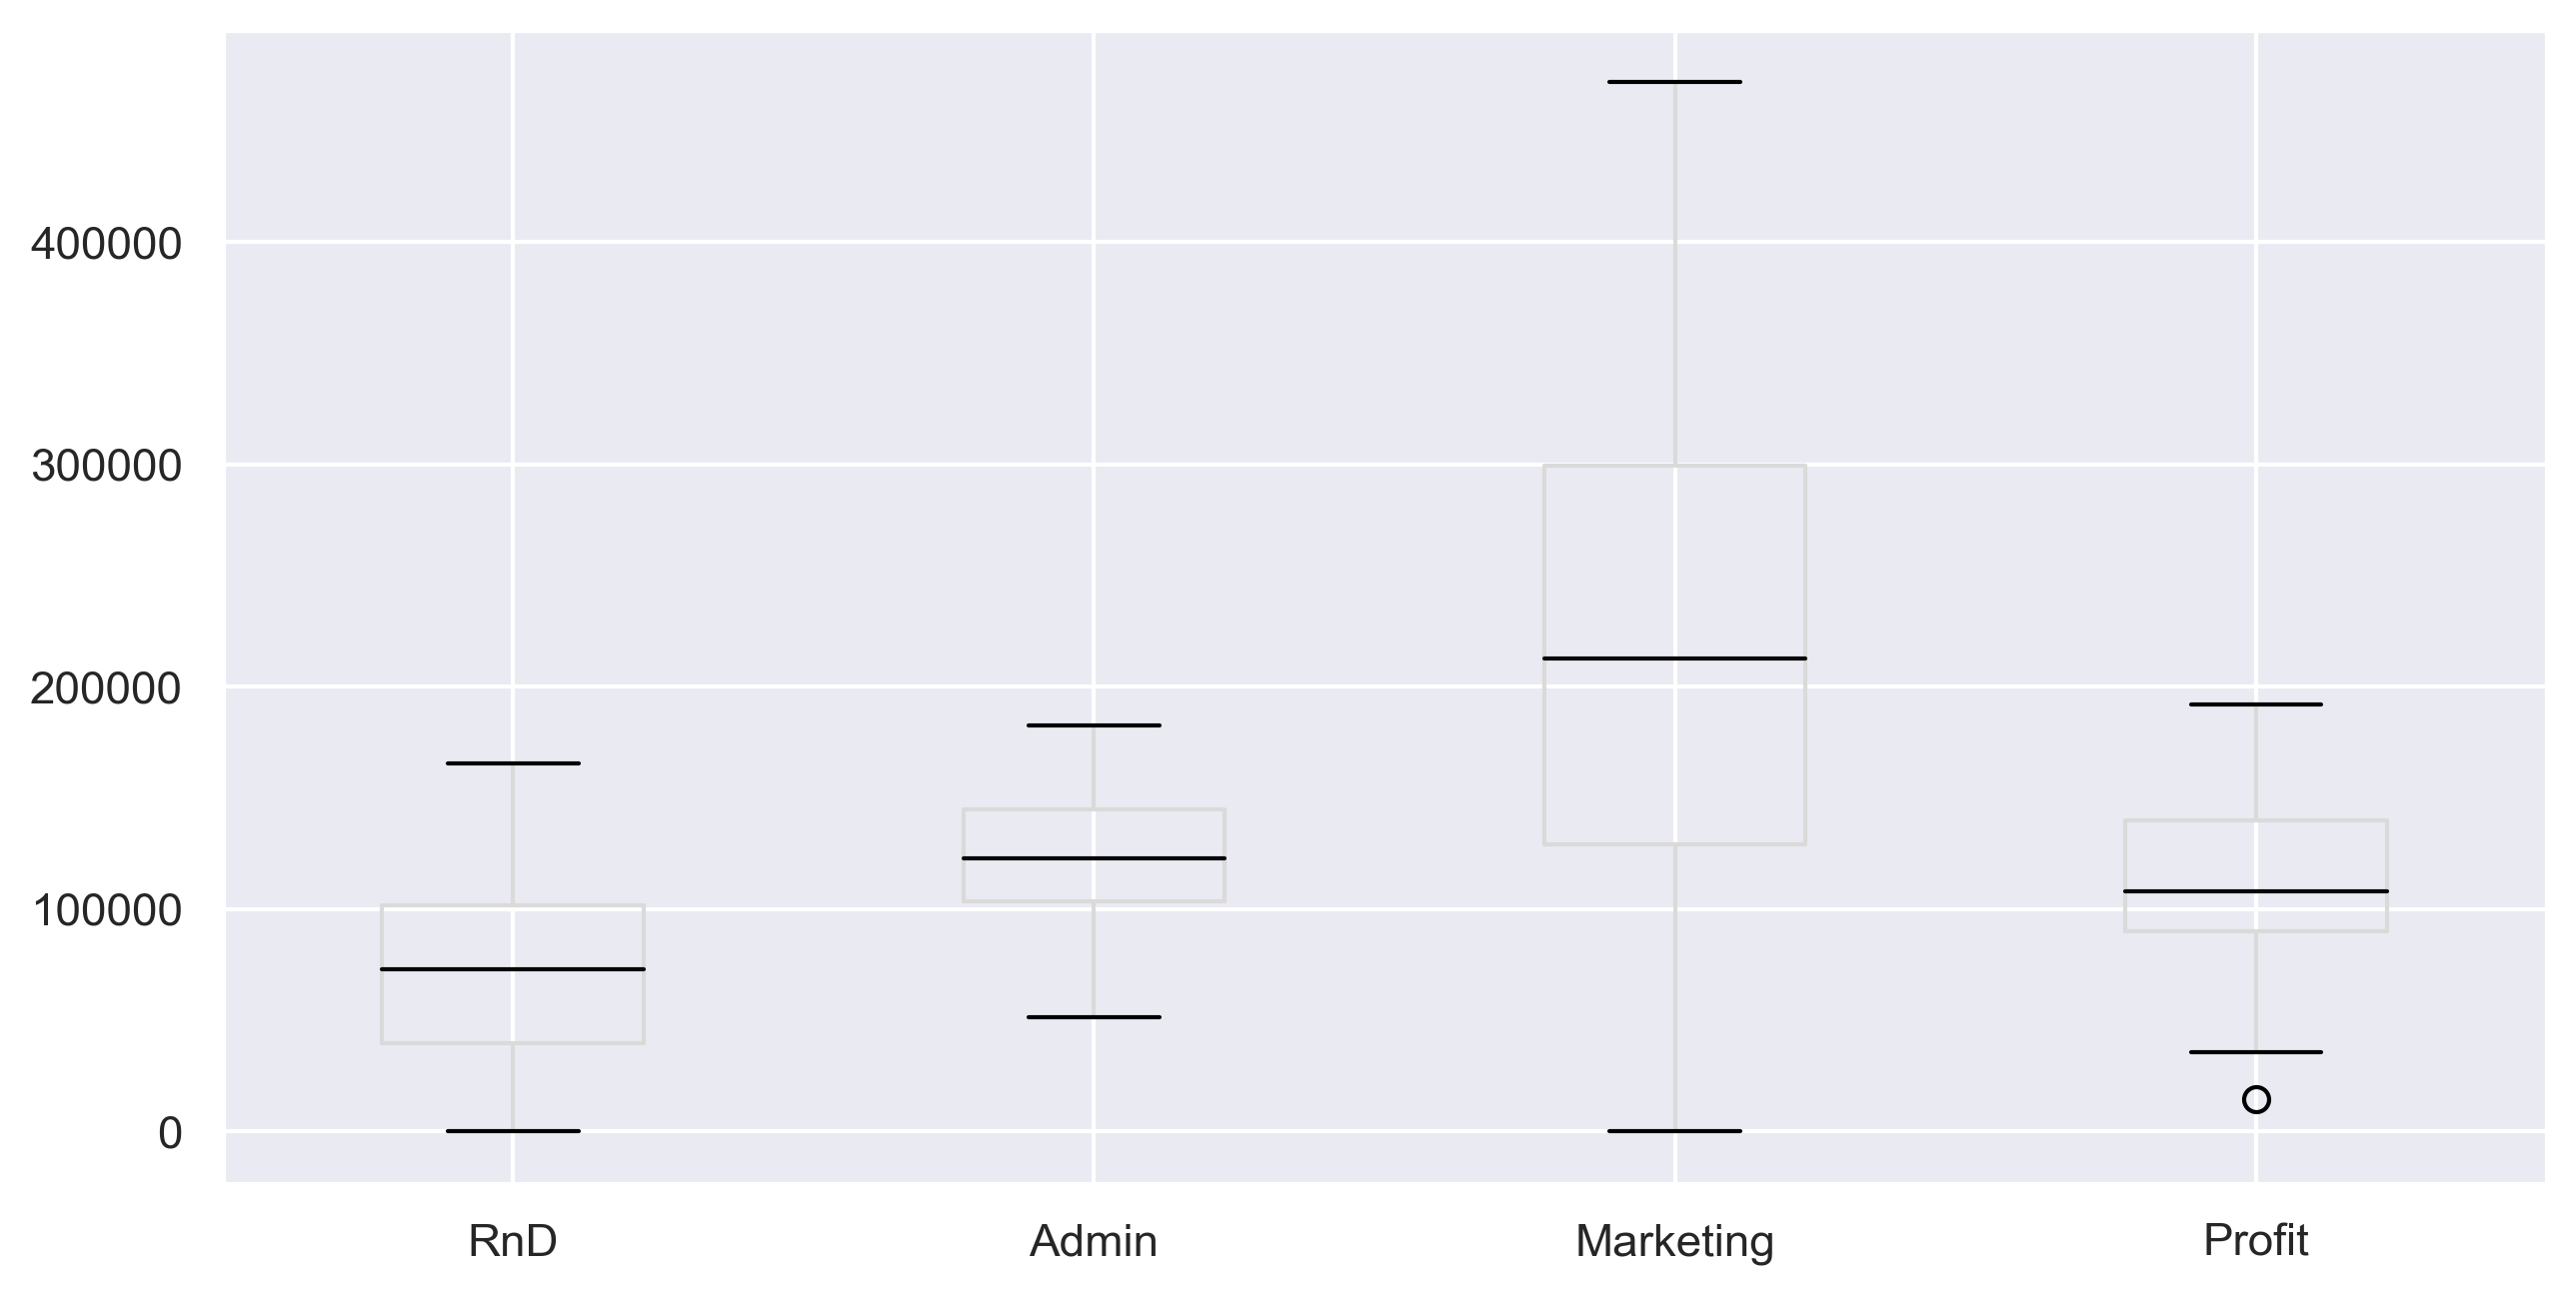

In [10]:
df1.boxplot()

From above boxplots we can see that only profit which is our dependent variable has outliers

Text(0.5, 1.0, 'profit before outliers removal')

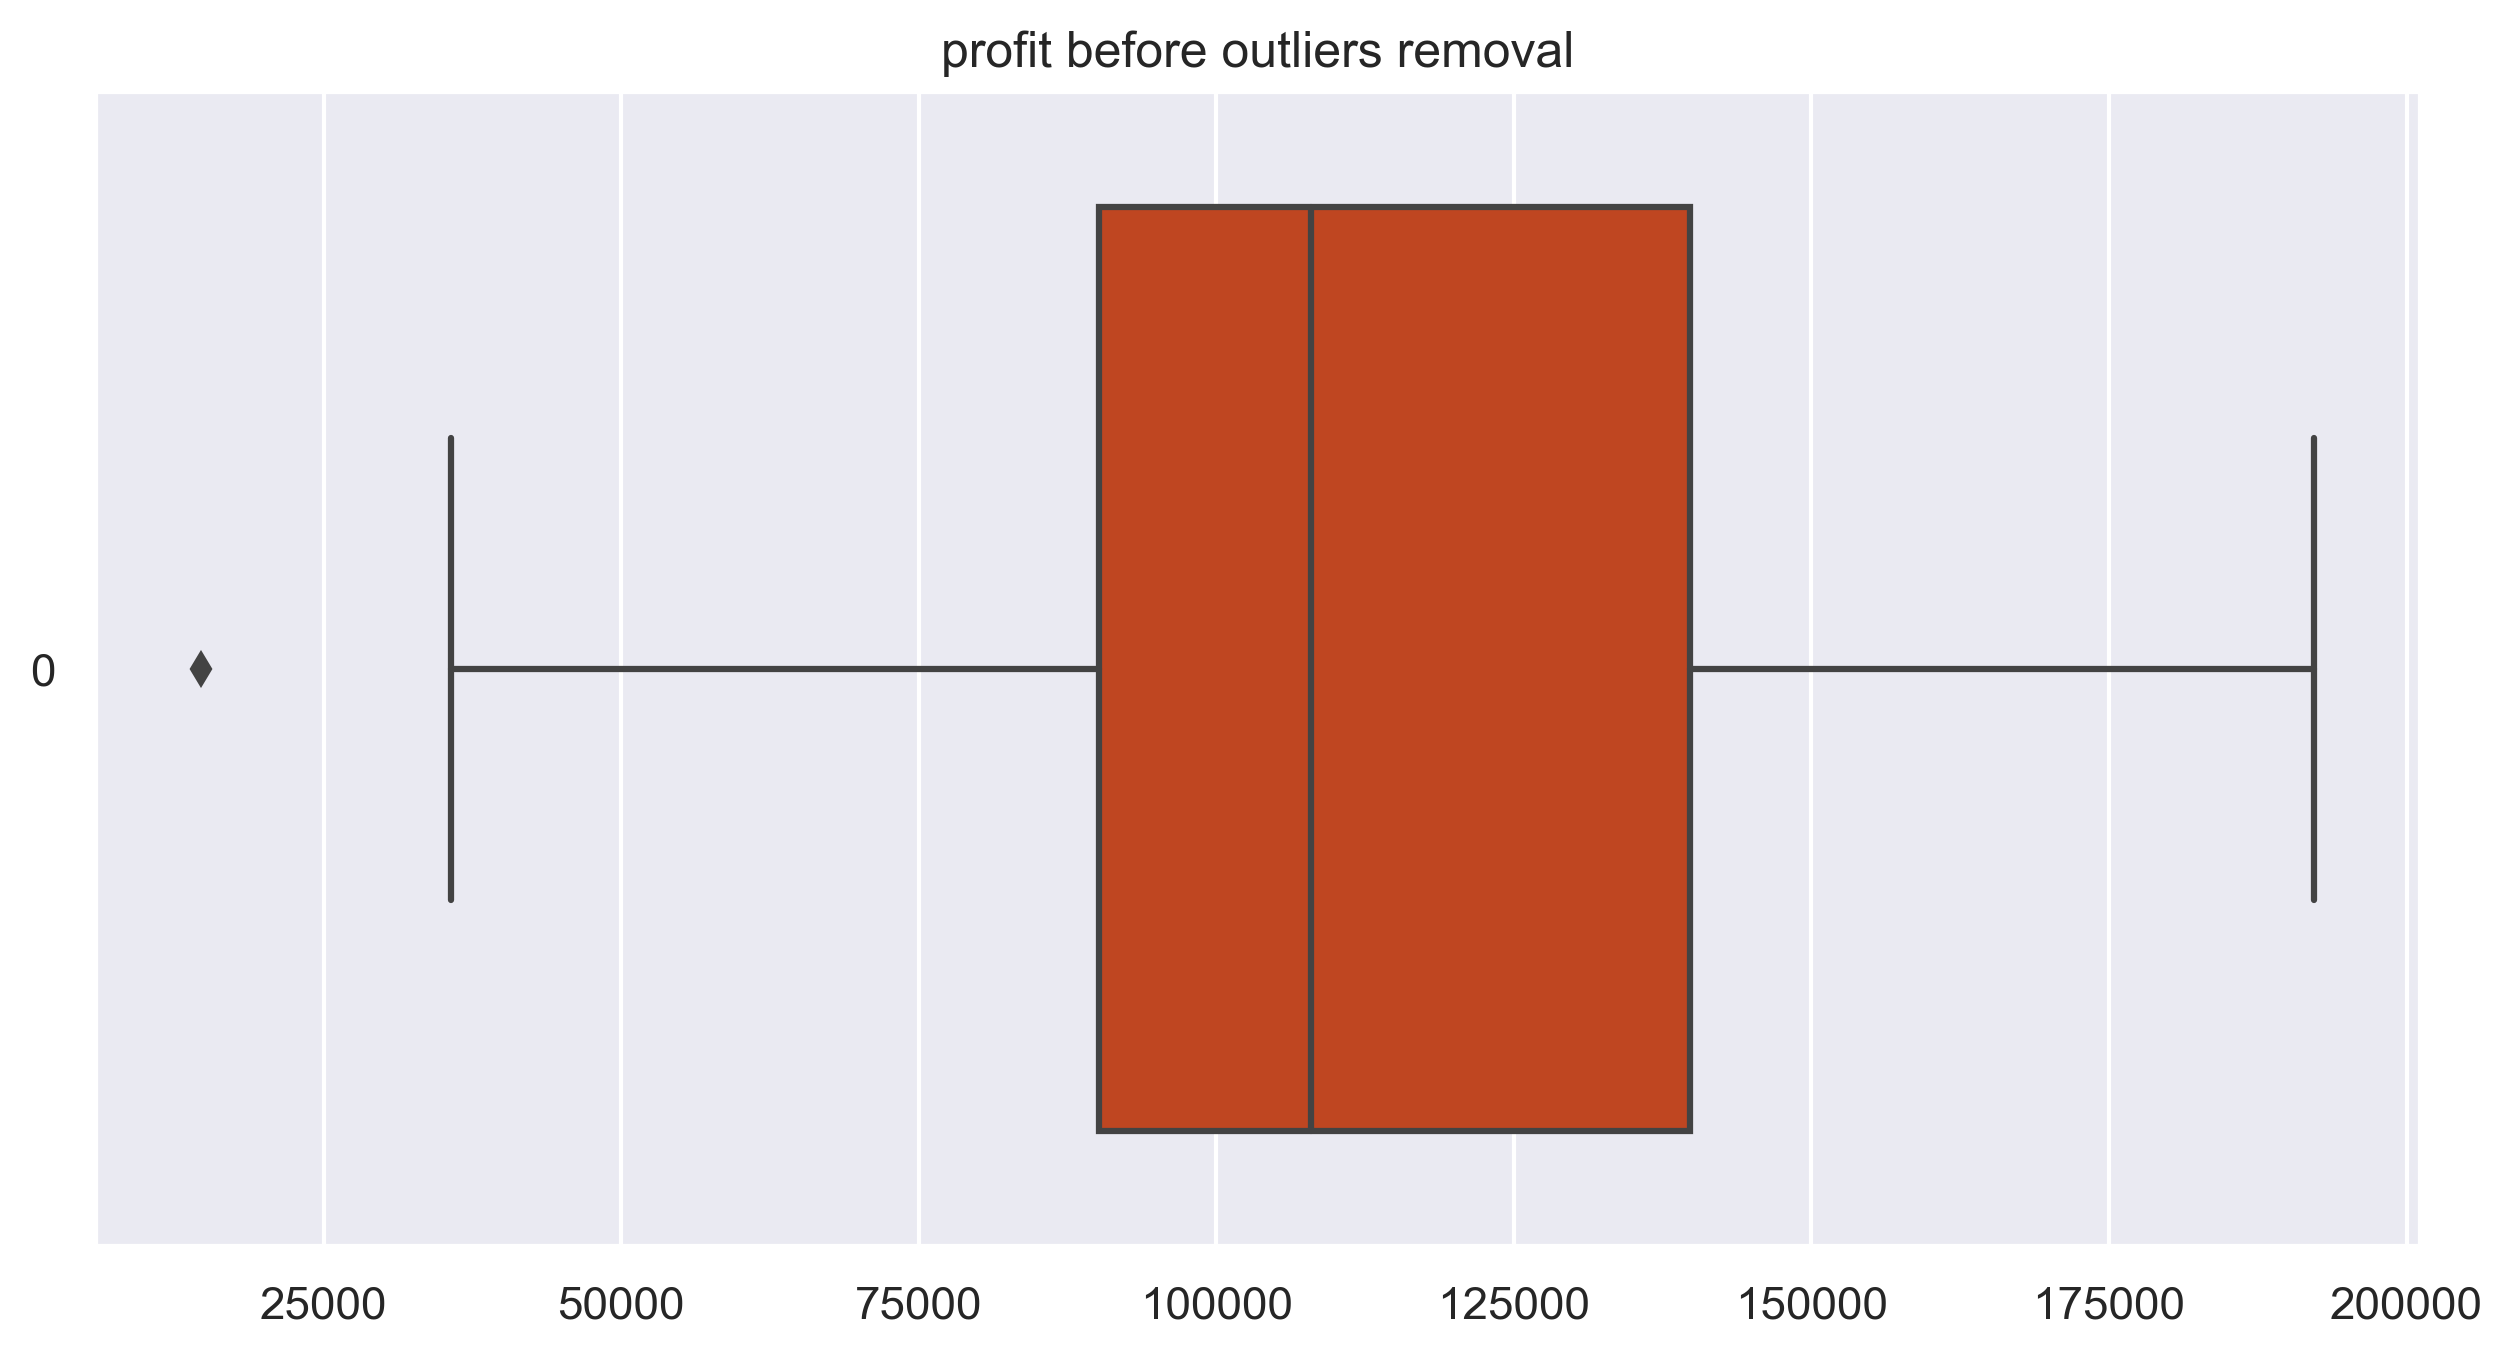

In [11]:
sns.boxplot(df1['Profit'],orient='h')
plt.title('profit before outliers removal')

In [12]:
df1.dtypes

RnD          float64
Admin        float64
Marketing    float64
Profit       float64
dtype: object

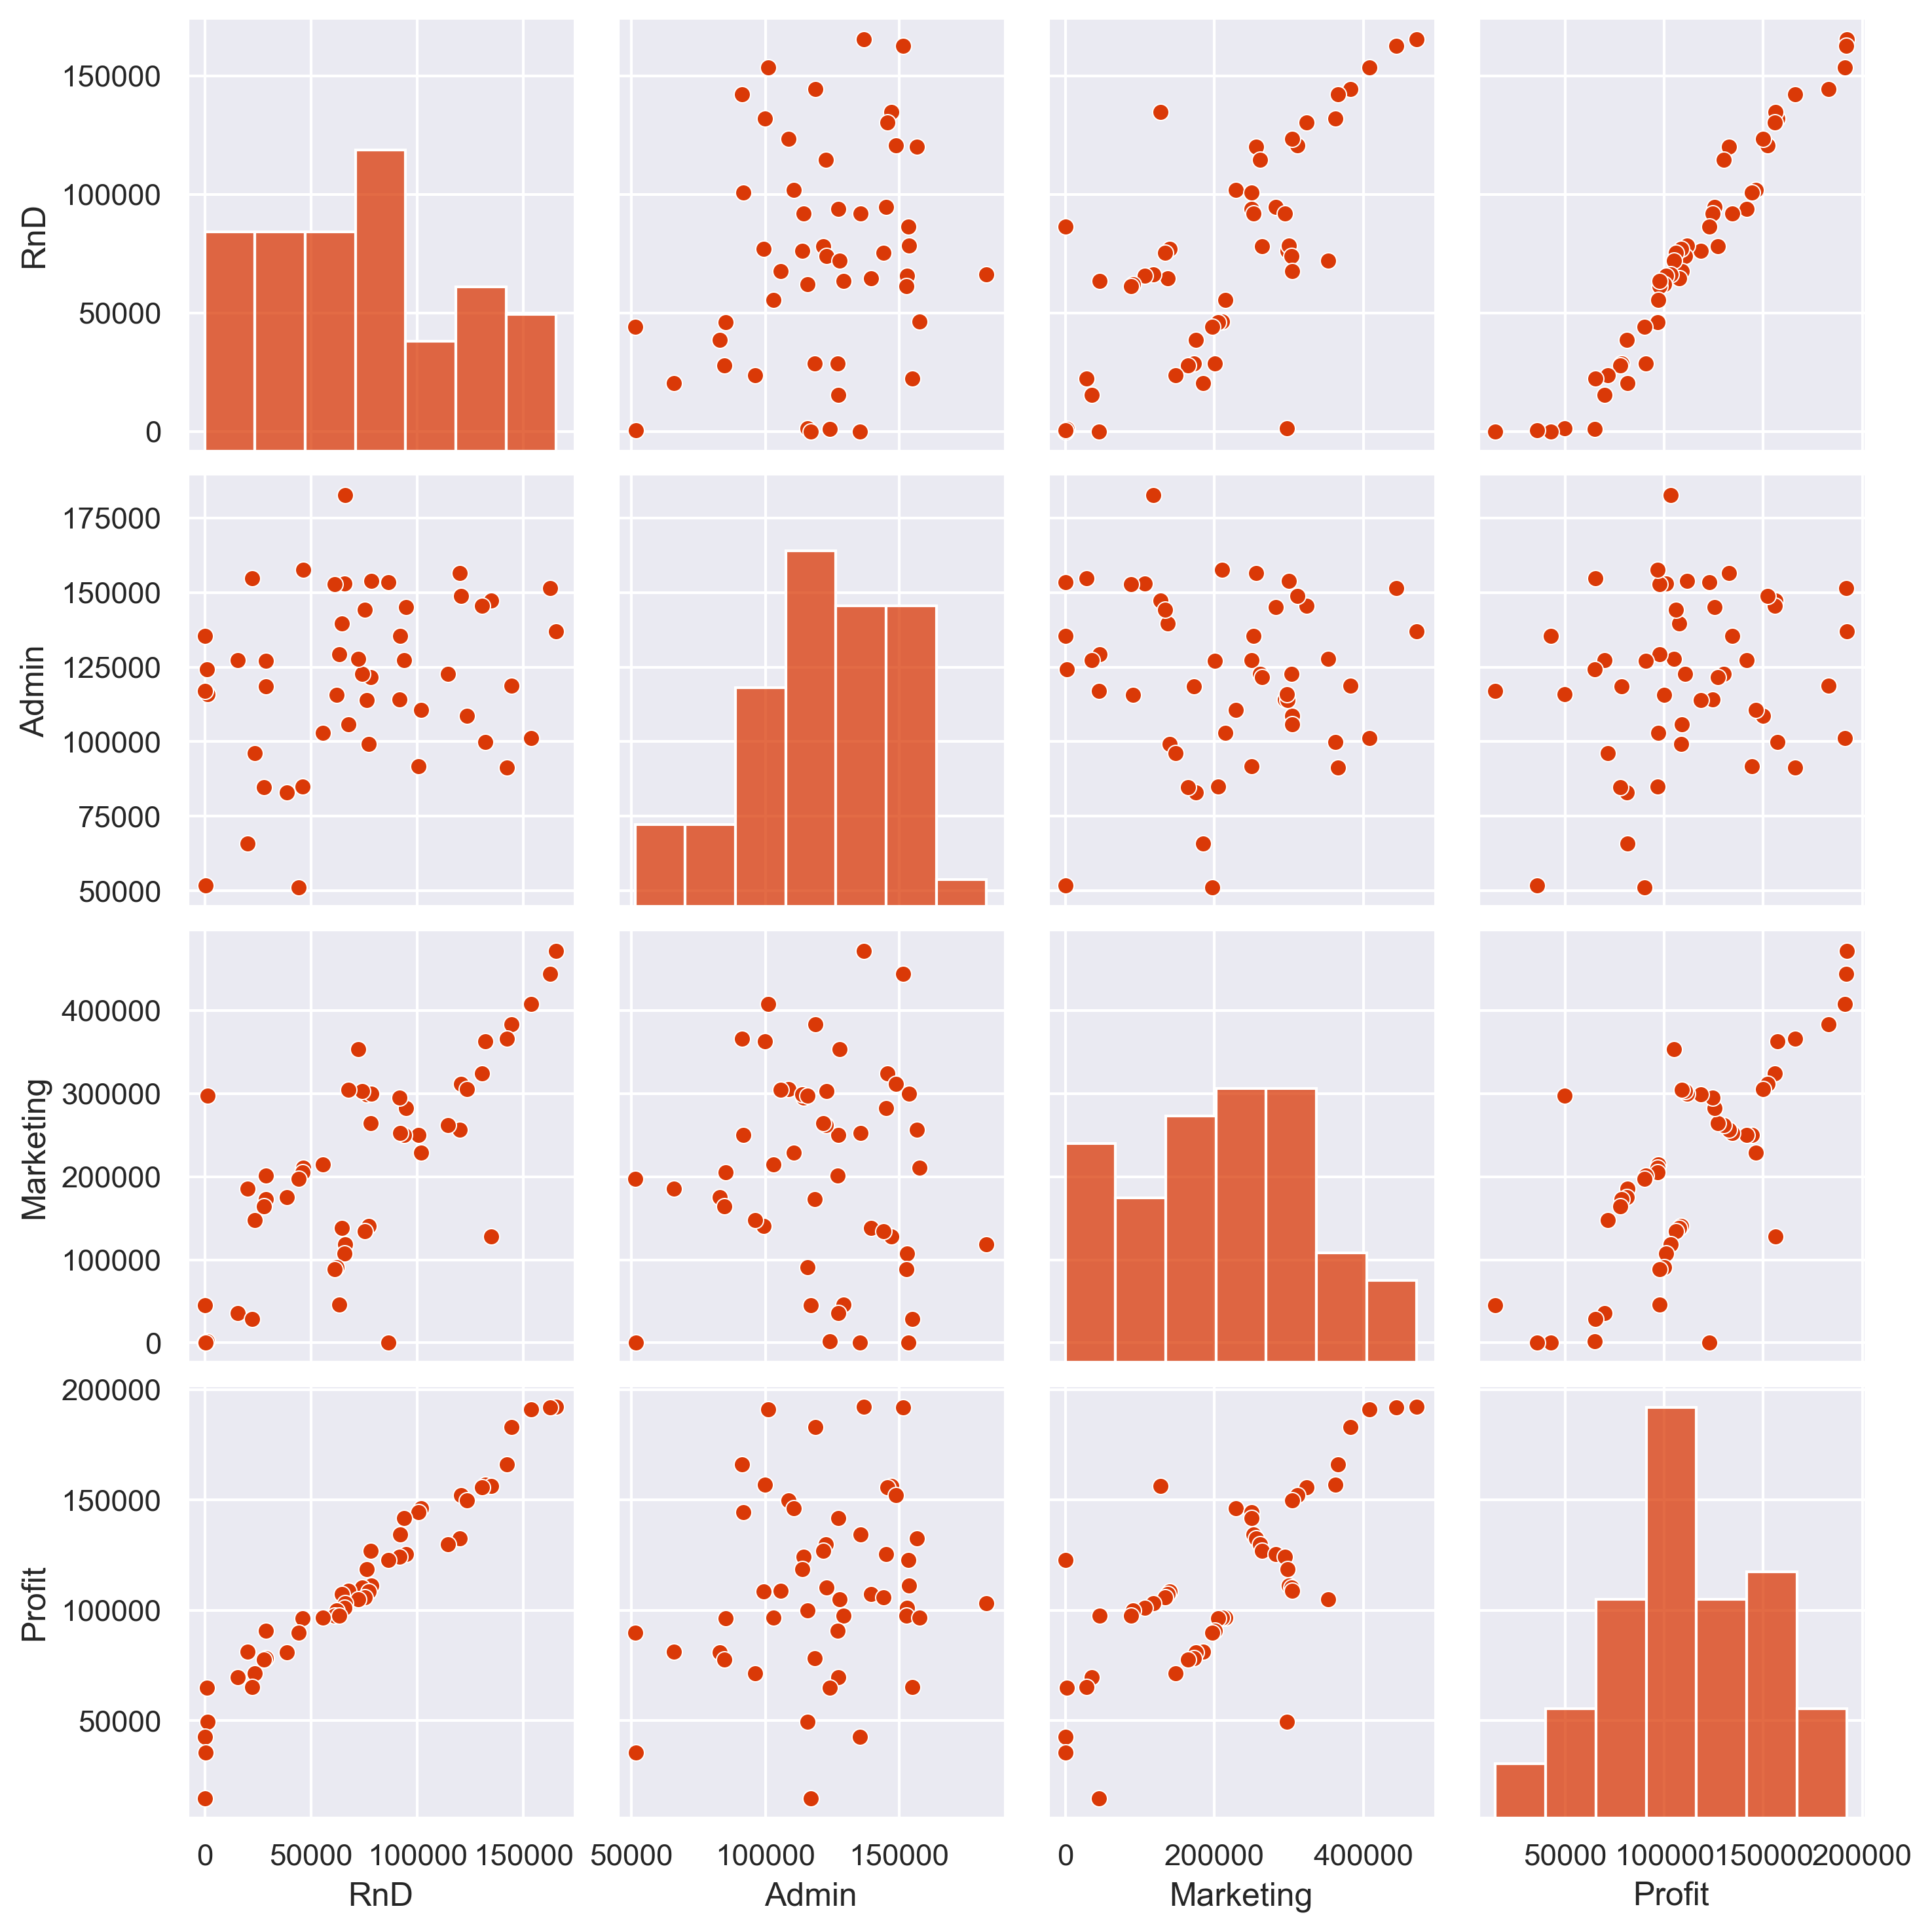

In [13]:
sns.pairplot(df1)

<Axes: >

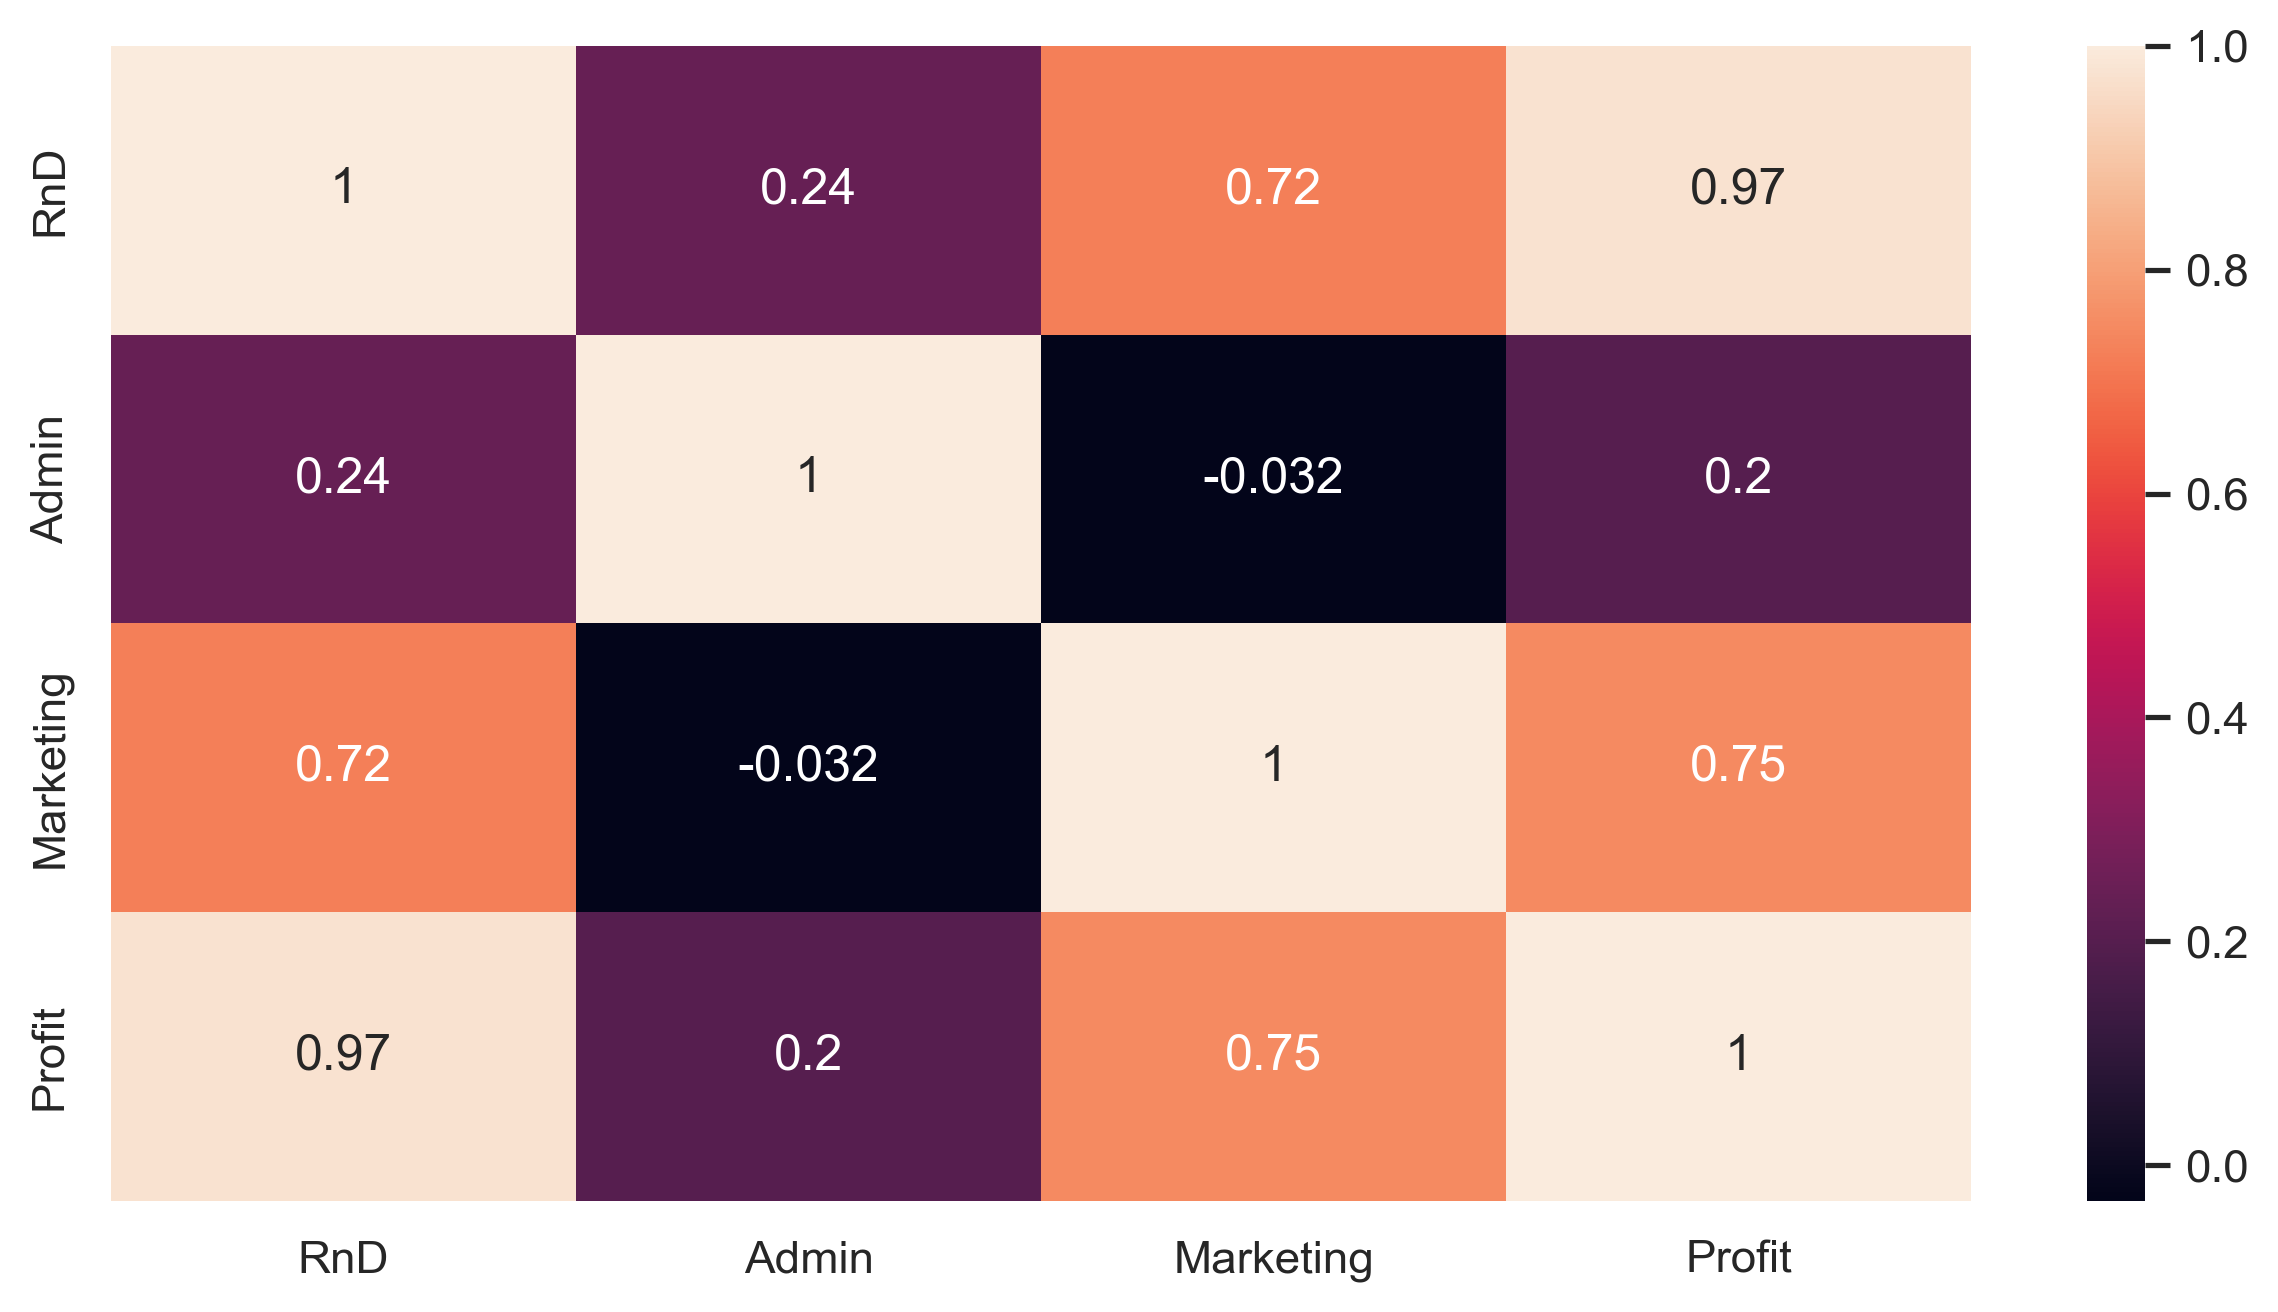

In [14]:
sns.heatmap(df1.corr(),annot=True)

In [15]:
#MLR with stastsmodel

In [16]:
df1.head()

,RnD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [17]:
raw_model=smf.ols('Profit~RnD+Admin+Marketing',data=df1).fit()

In [18]:
raw_model.pvalues.round(3)#pvalues of Administration,Marketing_Spend is hiher then aplha values(0.05) this will effect our model  

Intercept    0.000
RnD          0.000
Admin        0.602
Marketing    0.105
dtype: float64

In [19]:
raw_model.rsquared,raw_model.params

(0.9507459940683246,
 Intercept    50122.192990
 RnD              0.805715
 Admin           -0.026816
 Marketing        0.027228
 dtype: float64)

In [20]:
raw_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           4.53e-30
Time:                        19:46:33   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

raw_model has pvalues more than alpha values,this model is not perforiming well,
so 1st lets try to modify the outlier by removing it or by replacing it with mean or median

In [21]:
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr= q3 - q1
    
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    
    return print("lower:",lower,"upper:",upper)

In [22]:
outlier_detection(df1,'Profit')

lower: 15698.290000000023 upper: 214206.58999999997


In [23]:
df1[df1['Profit']<15698.290000000023]

,RnD,Admin,Marketing,Profit
49,0.0,116983.8,45173.06,14681.4


In [24]:
df1.loc[df1['Profit']<15698.290000000023,'Profit']

49    14681.4
Name: Profit, dtype: float64

In [25]:
df1_mean_replaced=df1.copy()
df1_mean_replaced.loc[df1_mean_replaced['Profit']<15698.290000000023,'Profit']=df1_mean_replaced['Profit'].mean()

In [26]:
df1_mean_replaced

,RnD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.8300
1,162597.70,151377.59,443898.53,191792.0600
2,153441.51,101145.55,407934.54,191050.3900
3,144372.41,118671.85,383199.62,182901.9900
4,142107.34,91391.77,366168.42,166187.9400
5,131876.90,99814.71,362861.36,156991.1200
6,134615.46,147198.87,127716.82,156122.5100
7,130298.13,145530.06,323876.68,155752.6000
8,120542.52,148718.95,311613.29,152211.7700
9,123334.88,108679.17,304981.62,149759.9600


Text(0.5, 1.0, 'profit after outlier replaced with mean')

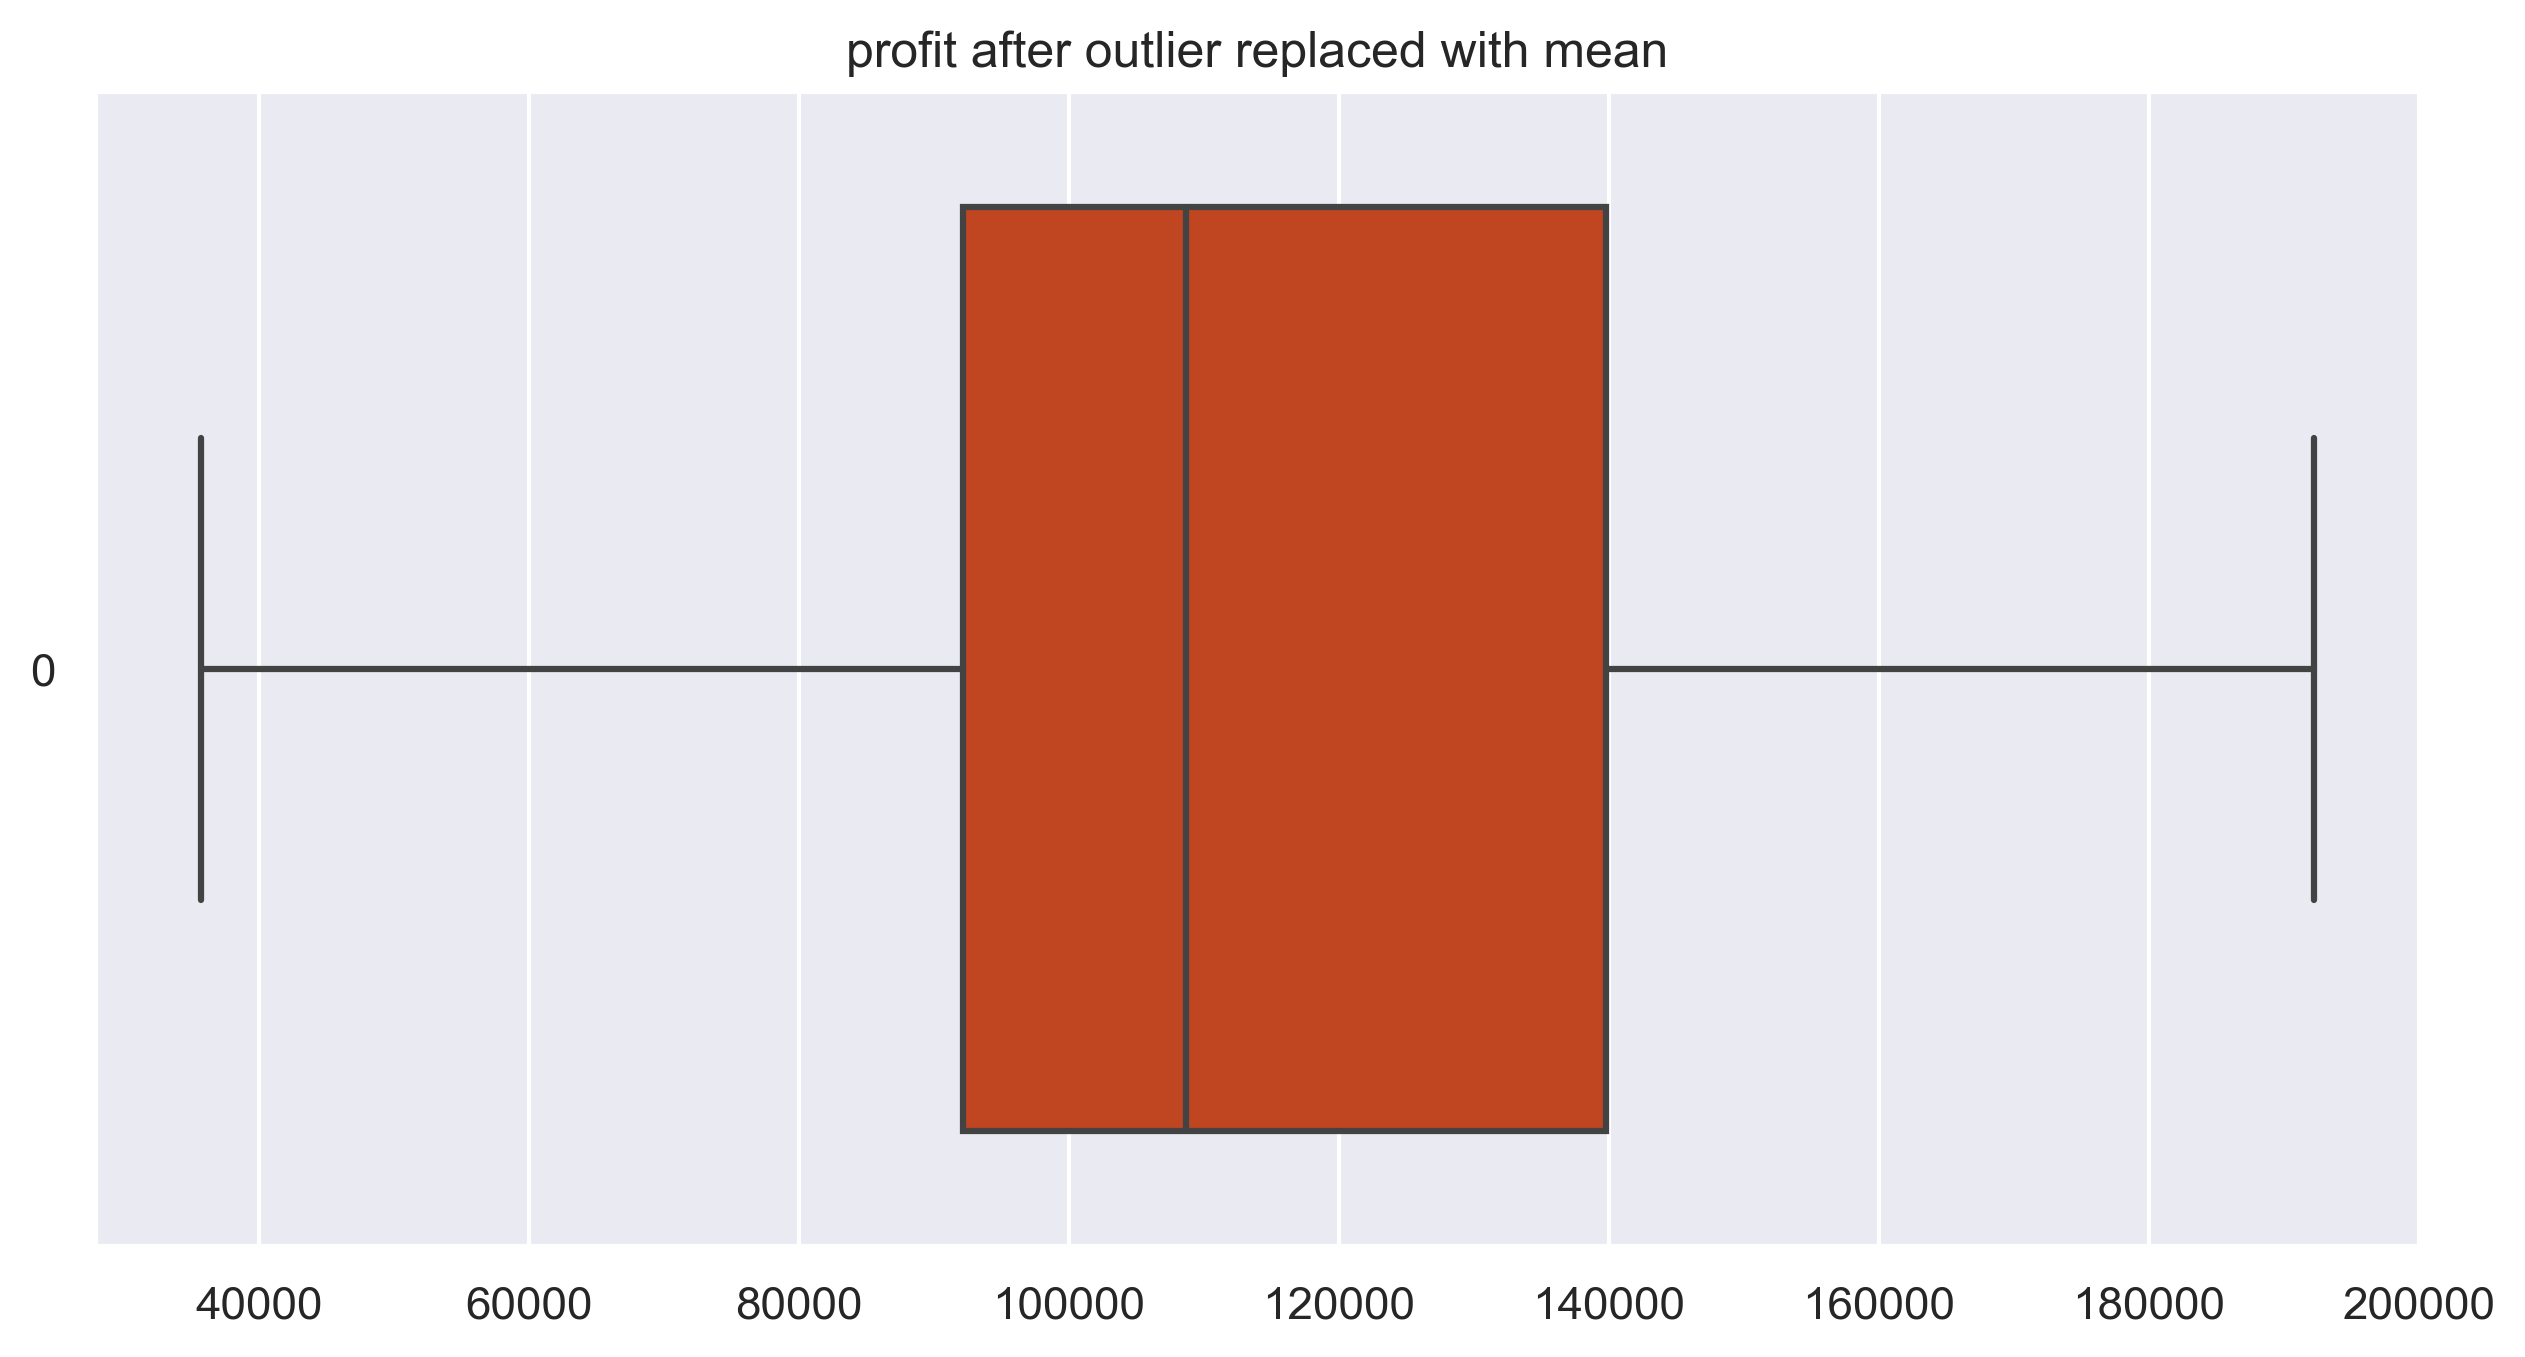

In [27]:
#lets build a model after replacing outlier with mean
sns.boxplot(df1_mean_replaced['Profit'],orient='h')
plt.title('profit after outlier replaced with mean')

In [28]:
model_mean_replaced=smf.ols('Profit~RnD+Admin+Marketing',data=df1_mean_replaced).fit()

In [29]:
model_mean_replaced.rsquared,raw_model.rsquared#rsqared value has decreased compair to raw model

(0.9119537155310937, 0.9507459940683246)

In [30]:
#lets try median replacement

In [31]:
df1_median_replaced=df1.copy()

In [32]:
df1_median_replaced.loc[df1_median_replaced['Profit']<15698.290000000023,'Profit']=df1_median_replaced['Profit'].median()

In [33]:
model_median_replaced=smf.ols('Profit~RnD+Admin+Marketing',data=df1_median_replaced).fit()

In [34]:
model_median_replaced.rsquared,raw_model.rsquared##rsqared value has decreased compair to raw model

(0.9182958360807372, 0.9507459940683246)

In [35]:
#lets build a model by capping the outlier to the lower wisher value

In [36]:
df1_cappped=df1.copy()

In [37]:
df1_cappped.loc[(df1_cappped['Profit']<15698.290000000023,'Profit')]=15698.290000000023

In [38]:
df1_cappped

,RnD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [39]:
model_capped=smf.ols('Profit~RnD+Admin+Marketing',data=df1_cappped).fit()

In [40]:
model_capped.rsquared,raw_model.rsquared#capping the model we can see minor improvement in rsquare value 

(0.9514706520592465, 0.9507459940683246)

In [41]:
#lets try dropping the outlier and build a model on it

In [42]:
df1_outlier_dropped=df1.copy()

In [43]:
df1_outlier_dropped.drop(index=49,inplace=True)

In [44]:
df1_outlier_dropped

,RnD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [45]:
model_outlier_dropped=smf.ols('Profit~RnD+Admin+Marketing',data=df1_outlier_dropped).fit()

In [46]:
model_outlier_dropped.rsquared,raw_model.rsquared#dropping the outlier seems to give the best rsquare value of all the models

(0.9613162435129847, 0.9507459940683246)

In [47]:
model_outlier_dropped.pvalues.round(2)#admin and marketing have pvalues>alpha(0.05) lests try to remedy that
#I will be using data with outlier removed from now on

Intercept    0.00
RnD          0.00
Admin        0.61
Marketing    0.07
dtype: float64

#lets check vif 
- This helps to check the dependency among the features by building a model without the target and testing various combination among the features

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
data=df1_outlier_dropped.drop(columns=df1_outlier_dropped[['Profit']])

In [50]:
vif=pd.DataFrame()
vif['Feature']=data.columns
vif['VIF']=[variance_inflation_factor(data.values,i)for i in range(len(data.columns))]

In [51]:
vif#since non of the values is vif>20,so no collinirity exits.

,Feature,VIF
0,RnD,8.602235
1,Admin,4.218831
2,Marketing,7.589312


# let us build 2 models one conating [RnD and Admin] and another with [Marketing and RnD]

In [52]:
model_Admin=smf.ols('Profit~RnD+Admin',data=df1_outlier_dropped).fit()
model_Marketing=smf.ols('Profit~RnD+Marketing',data=df1_outlier_dropped).fit()

In [53]:
model_Admin.rsquared,model_Marketing.rsquared#model containing [Marketing and RnD] is giving us better rsquare value

(0.9584519070123048, 0.9610856807456628)

In [54]:
model_Admin.pvalues.round(2),model_Marketing.pvalues.round(2)#model containing [RnD and Admin] still has pvalues>alpha(0.05)

(Intercept    0.00
 RnD          0.00
 Admin        0.27
 dtype: float64,
 Intercept    0.00
 RnD          0.00
 Marketing    0.04
 dtype: float64)

In [55]:
model_Admin.aic,model_Marketing.aic#aic of [Marketing and RnD] is less which is better

(1022.0654576388338, 1018.8564801588338)

In [56]:
print('RMSE of [RnD and Admin]:',np.sqrt(model_Admin.mse_resid)),print('RMSE of [Marketing and RnD]:',np.sqrt(model_Marketing.mse_resid))

RMSE of [RnD and Admin]: 7947.922013017301
RMSE of [Marketing and RnD]: 7691.884748549172


(None, None)

From above RMSE values RMSE of model [Marketing and RnD] is less which is better

# Residual Analysis
# Q-Q plot
To check normality of errors

In [57]:
import statsmodels.api as sm

In [58]:
model_Marketing.resid

0      1319.103073
1      3748.135480
2     11093.077528
3     10655.573836
4     -3834.747457
5     -5008.285410
6     -1546.668690
7     -3952.698181
8       407.389395
9     -4027.561922
10    11025.483132
11     9560.350142
12    12162.842013
13     6258.147345
14   -17224.800777
15   -15852.571357
16     9462.440909
17    -5565.930519
18    -4753.406206
19     5983.149252
20     1365.748687
21    -7480.622939
22    -5131.959637
23    -1779.447292
24    -4830.059441
25     3692.642914
26    -6139.592740
27   -10381.339335
28     -960.810309
29    -2590.527960
30     -418.342697
31    -2127.066757
32    -2788.469933
33    -1926.225163
34     5144.054935
35     5375.174975
36    13177.474910
37      585.169015
38    10673.397237
39    -3480.101451
40     1416.531270
41     1871.857461
42     -679.541523
43     6975.563875
44    -2558.862437
45    14312.993620
46    -9468.964353
47    -7225.539847
48   -14532.156671
dtype: float64

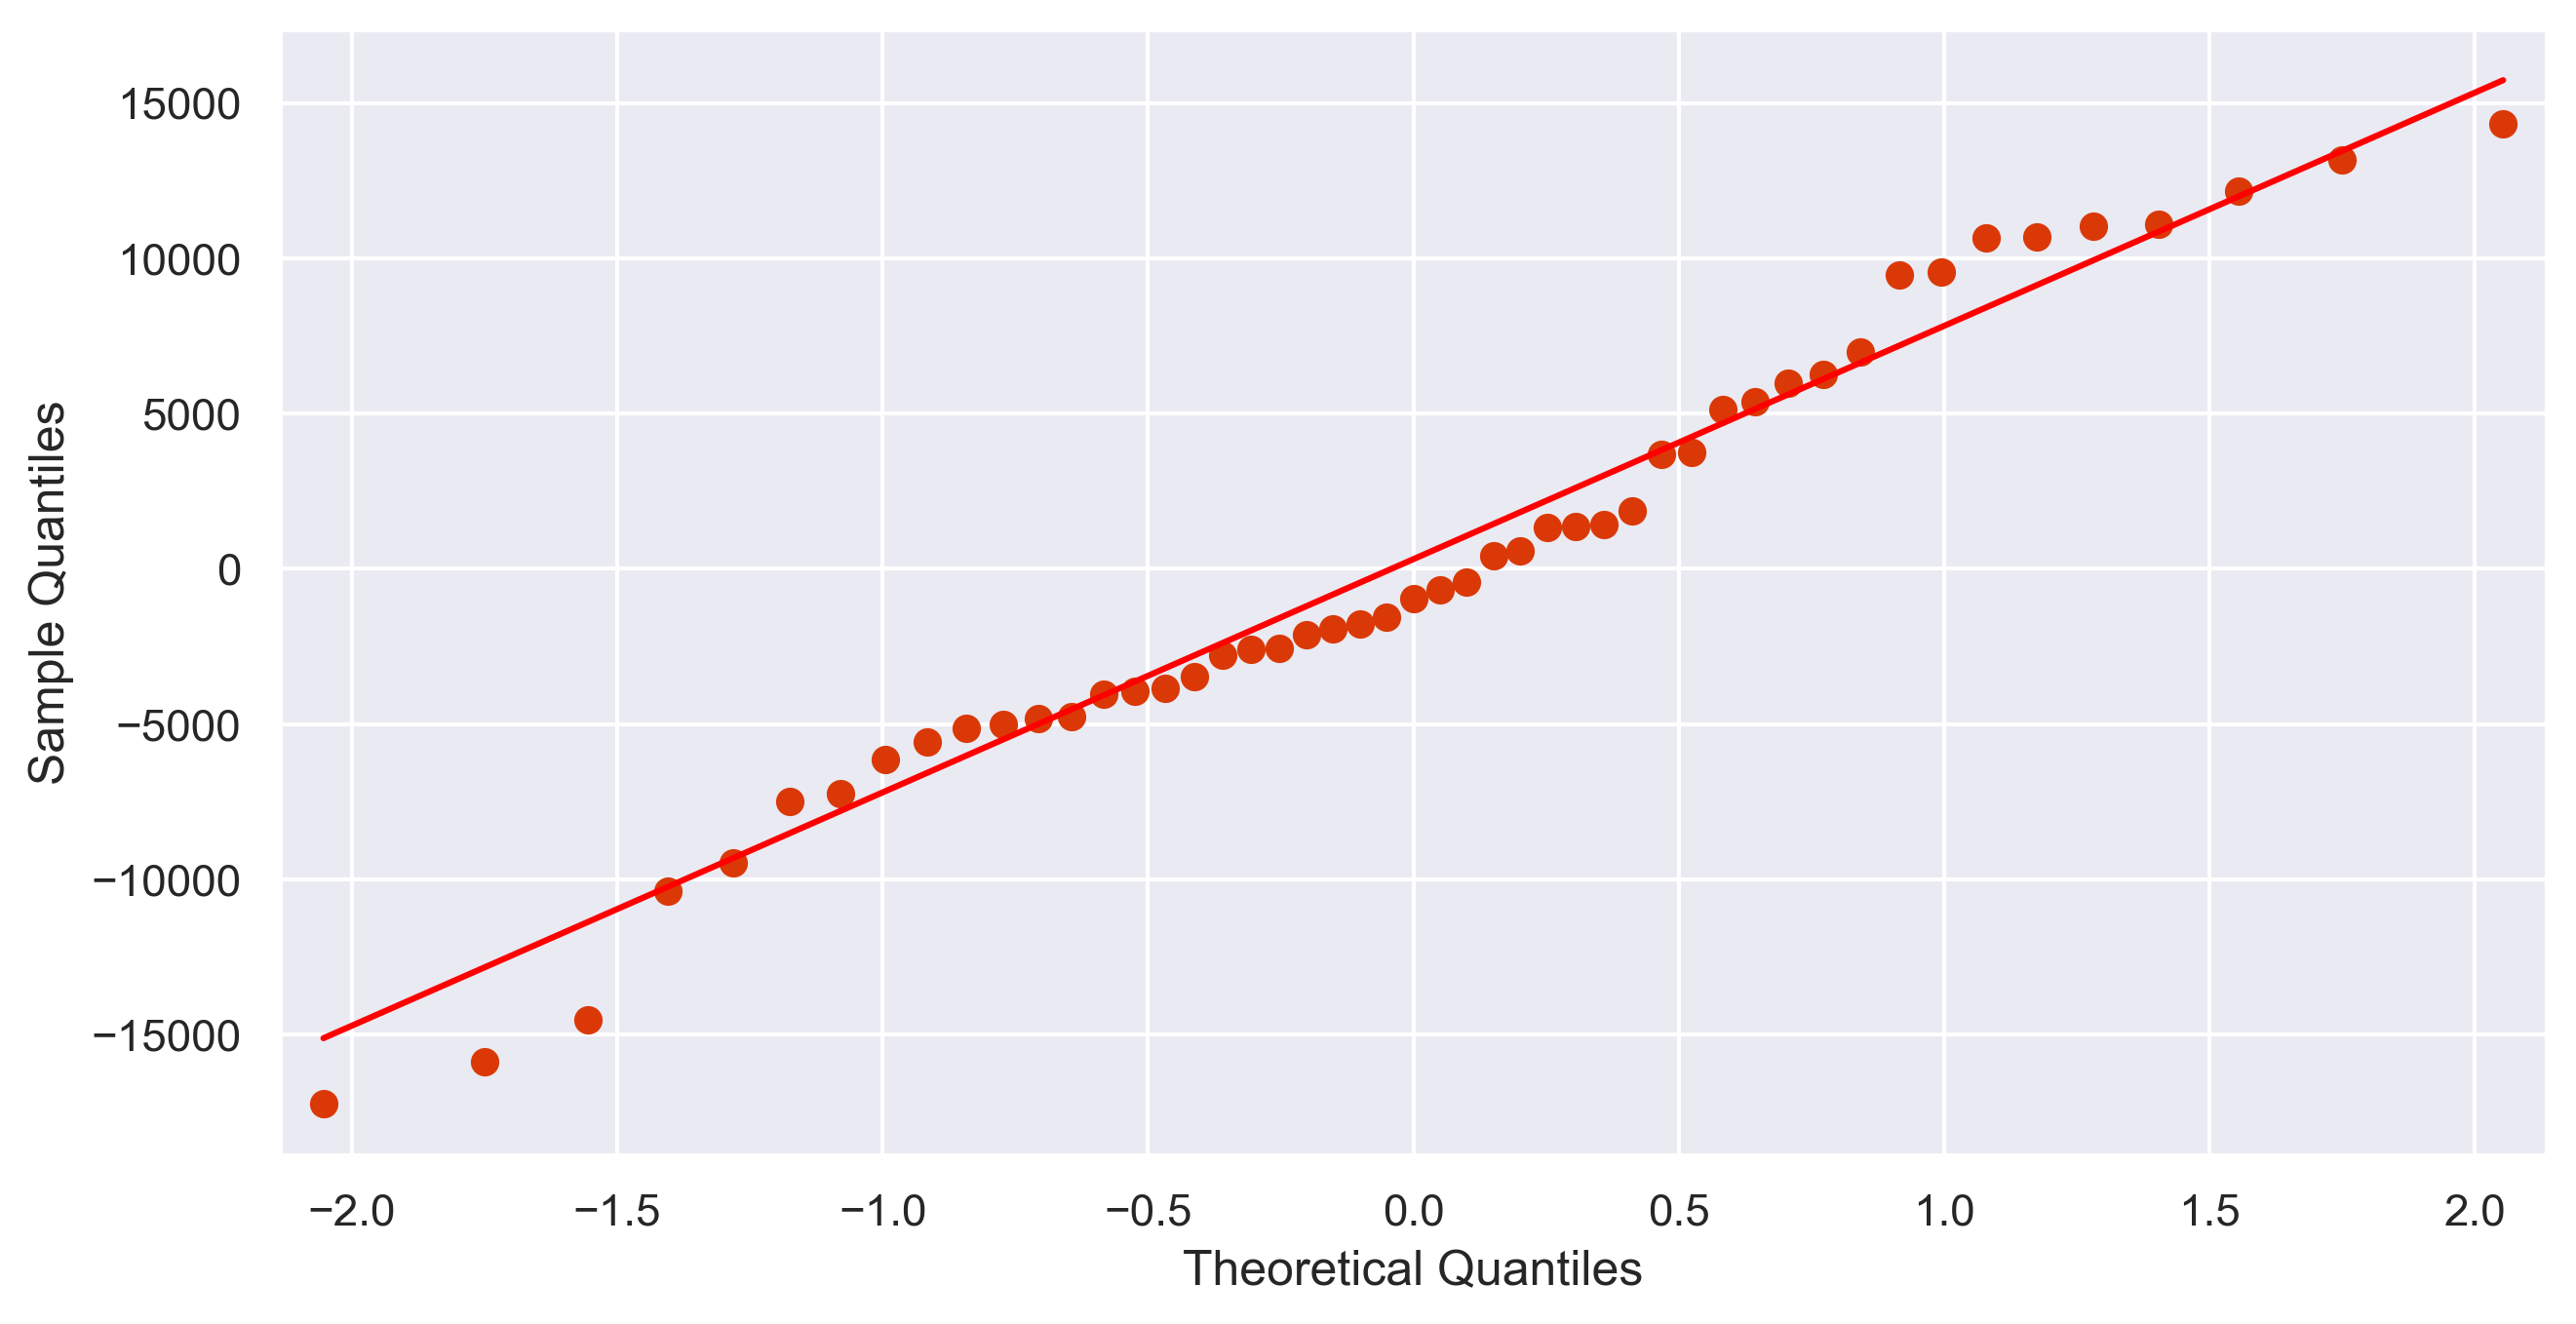

In [59]:
sm.qqplot(model_Marketing.resid,line='q');

# 2. Residual plot of homoscedasticity
To check to check if there is any pattern

<Axes: >

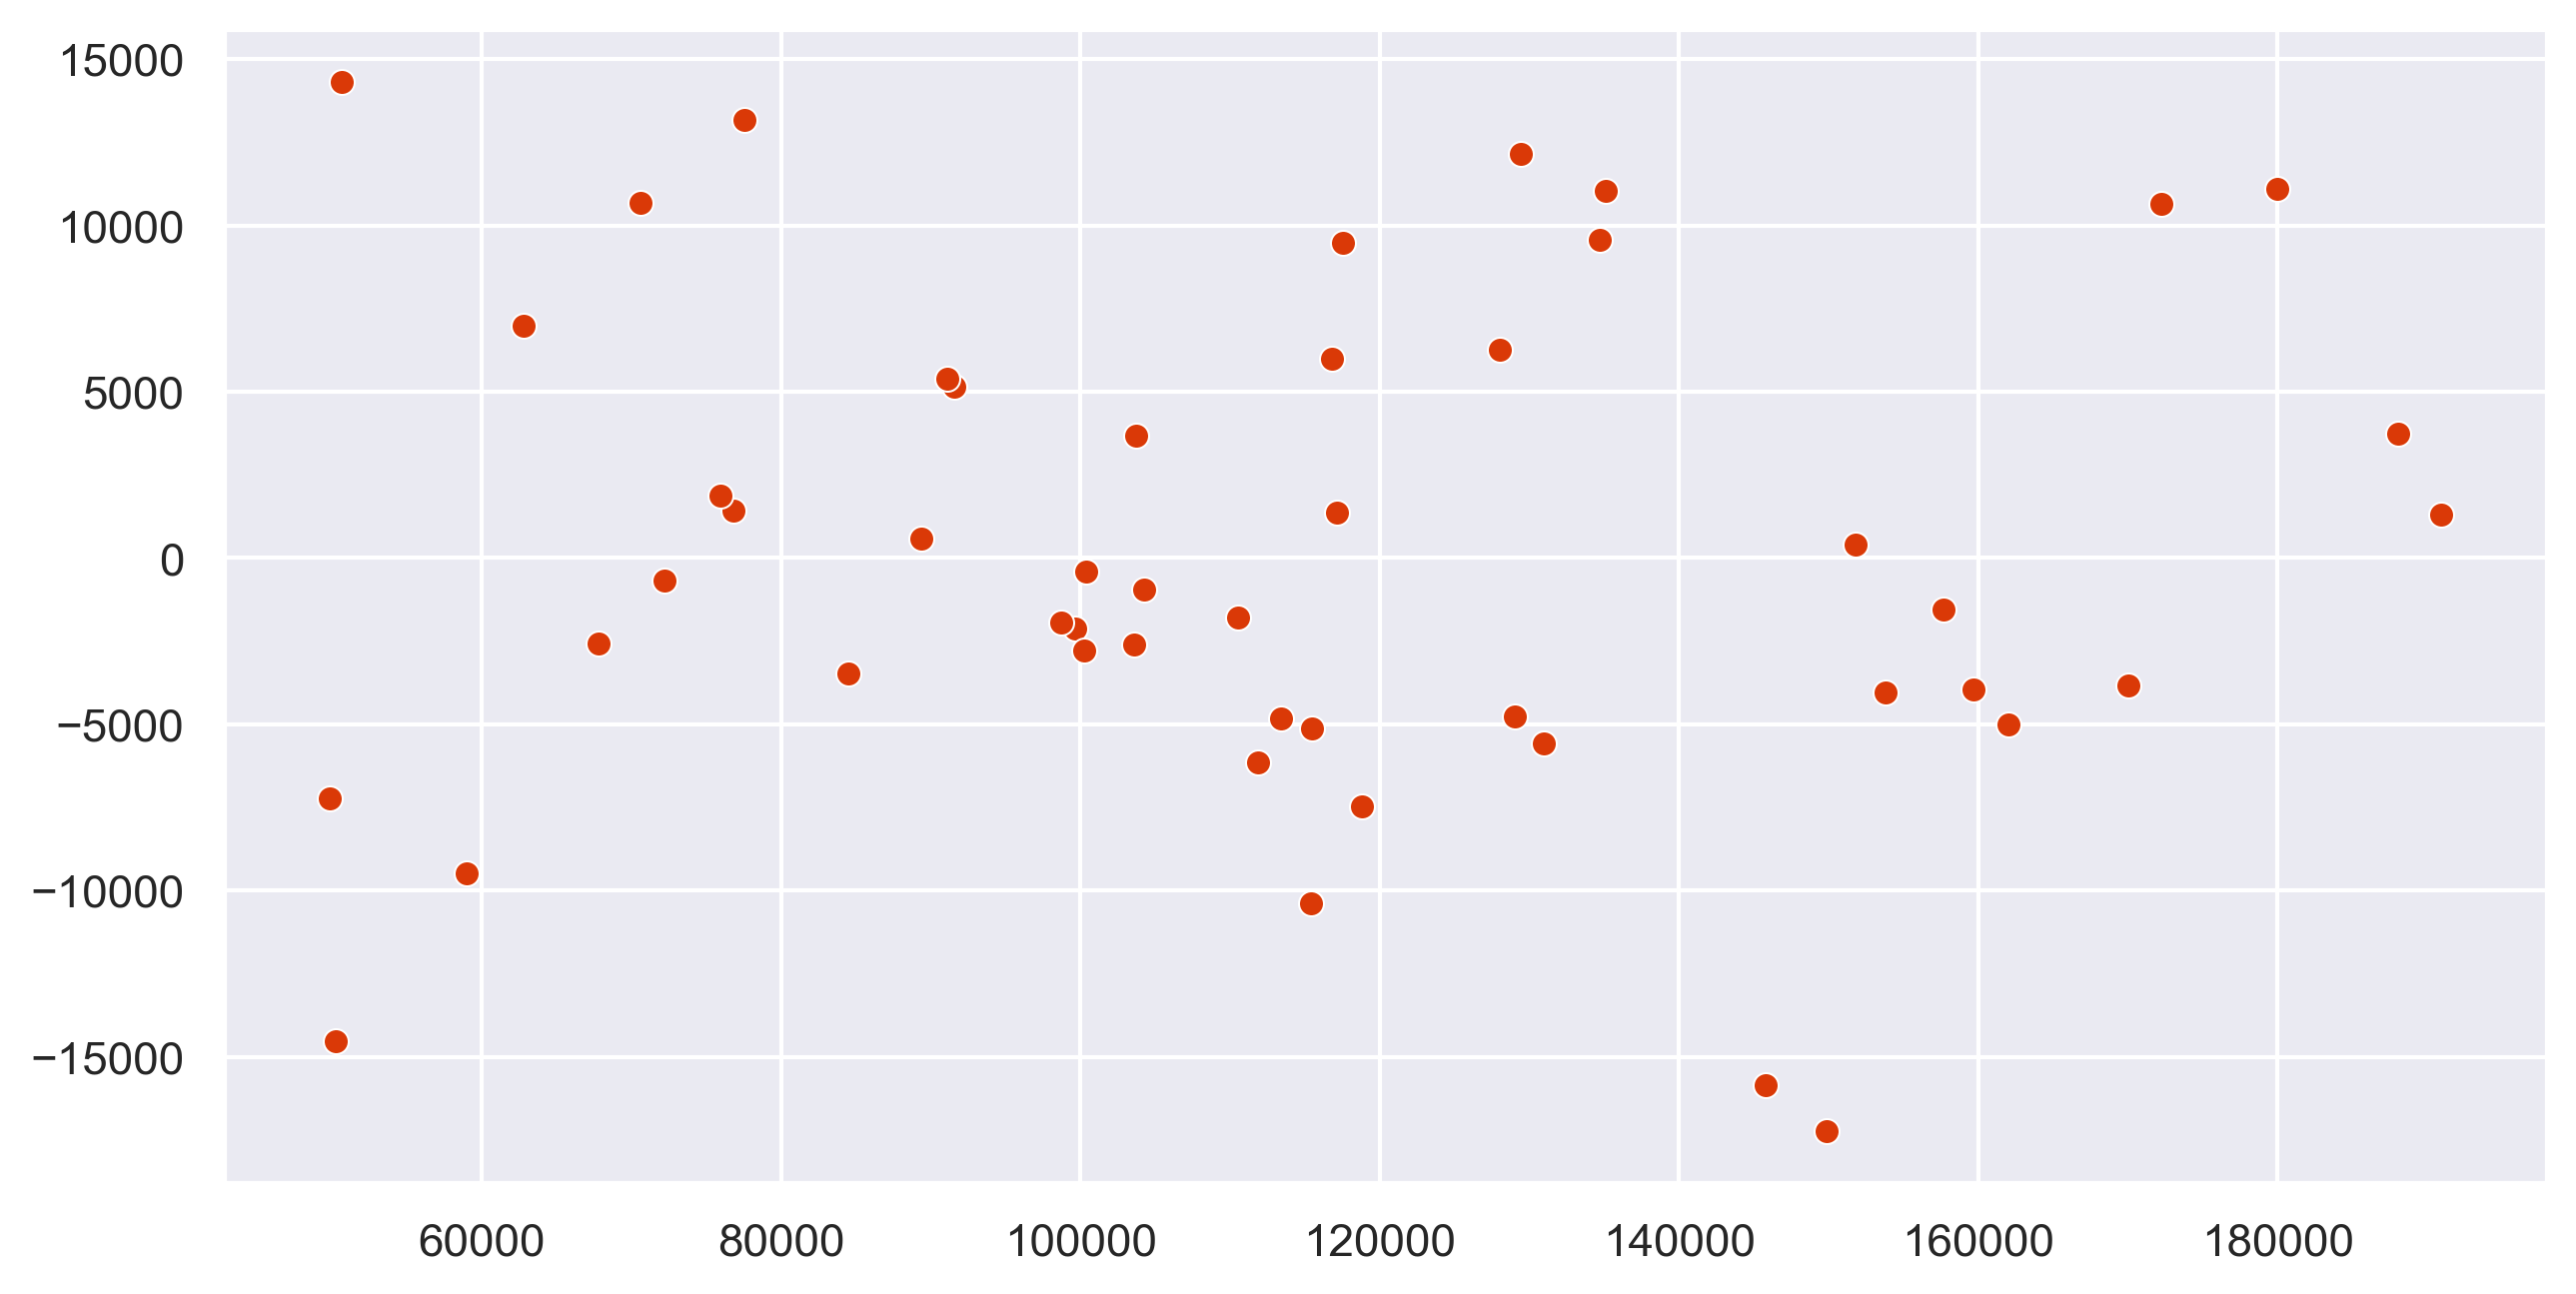

In [60]:
sns.scatterplot(x=model_Marketing.fittedvalues,y=model_Marketing.resid)

3.Residual vs Regressor
Weather erros are independent of our features

In [61]:
df1_outlier_dropped.head()

,RnD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


(<Figure size 3000x1500 with 4 Axes>, <Figure size 3000x1500 with 1 Axes>)

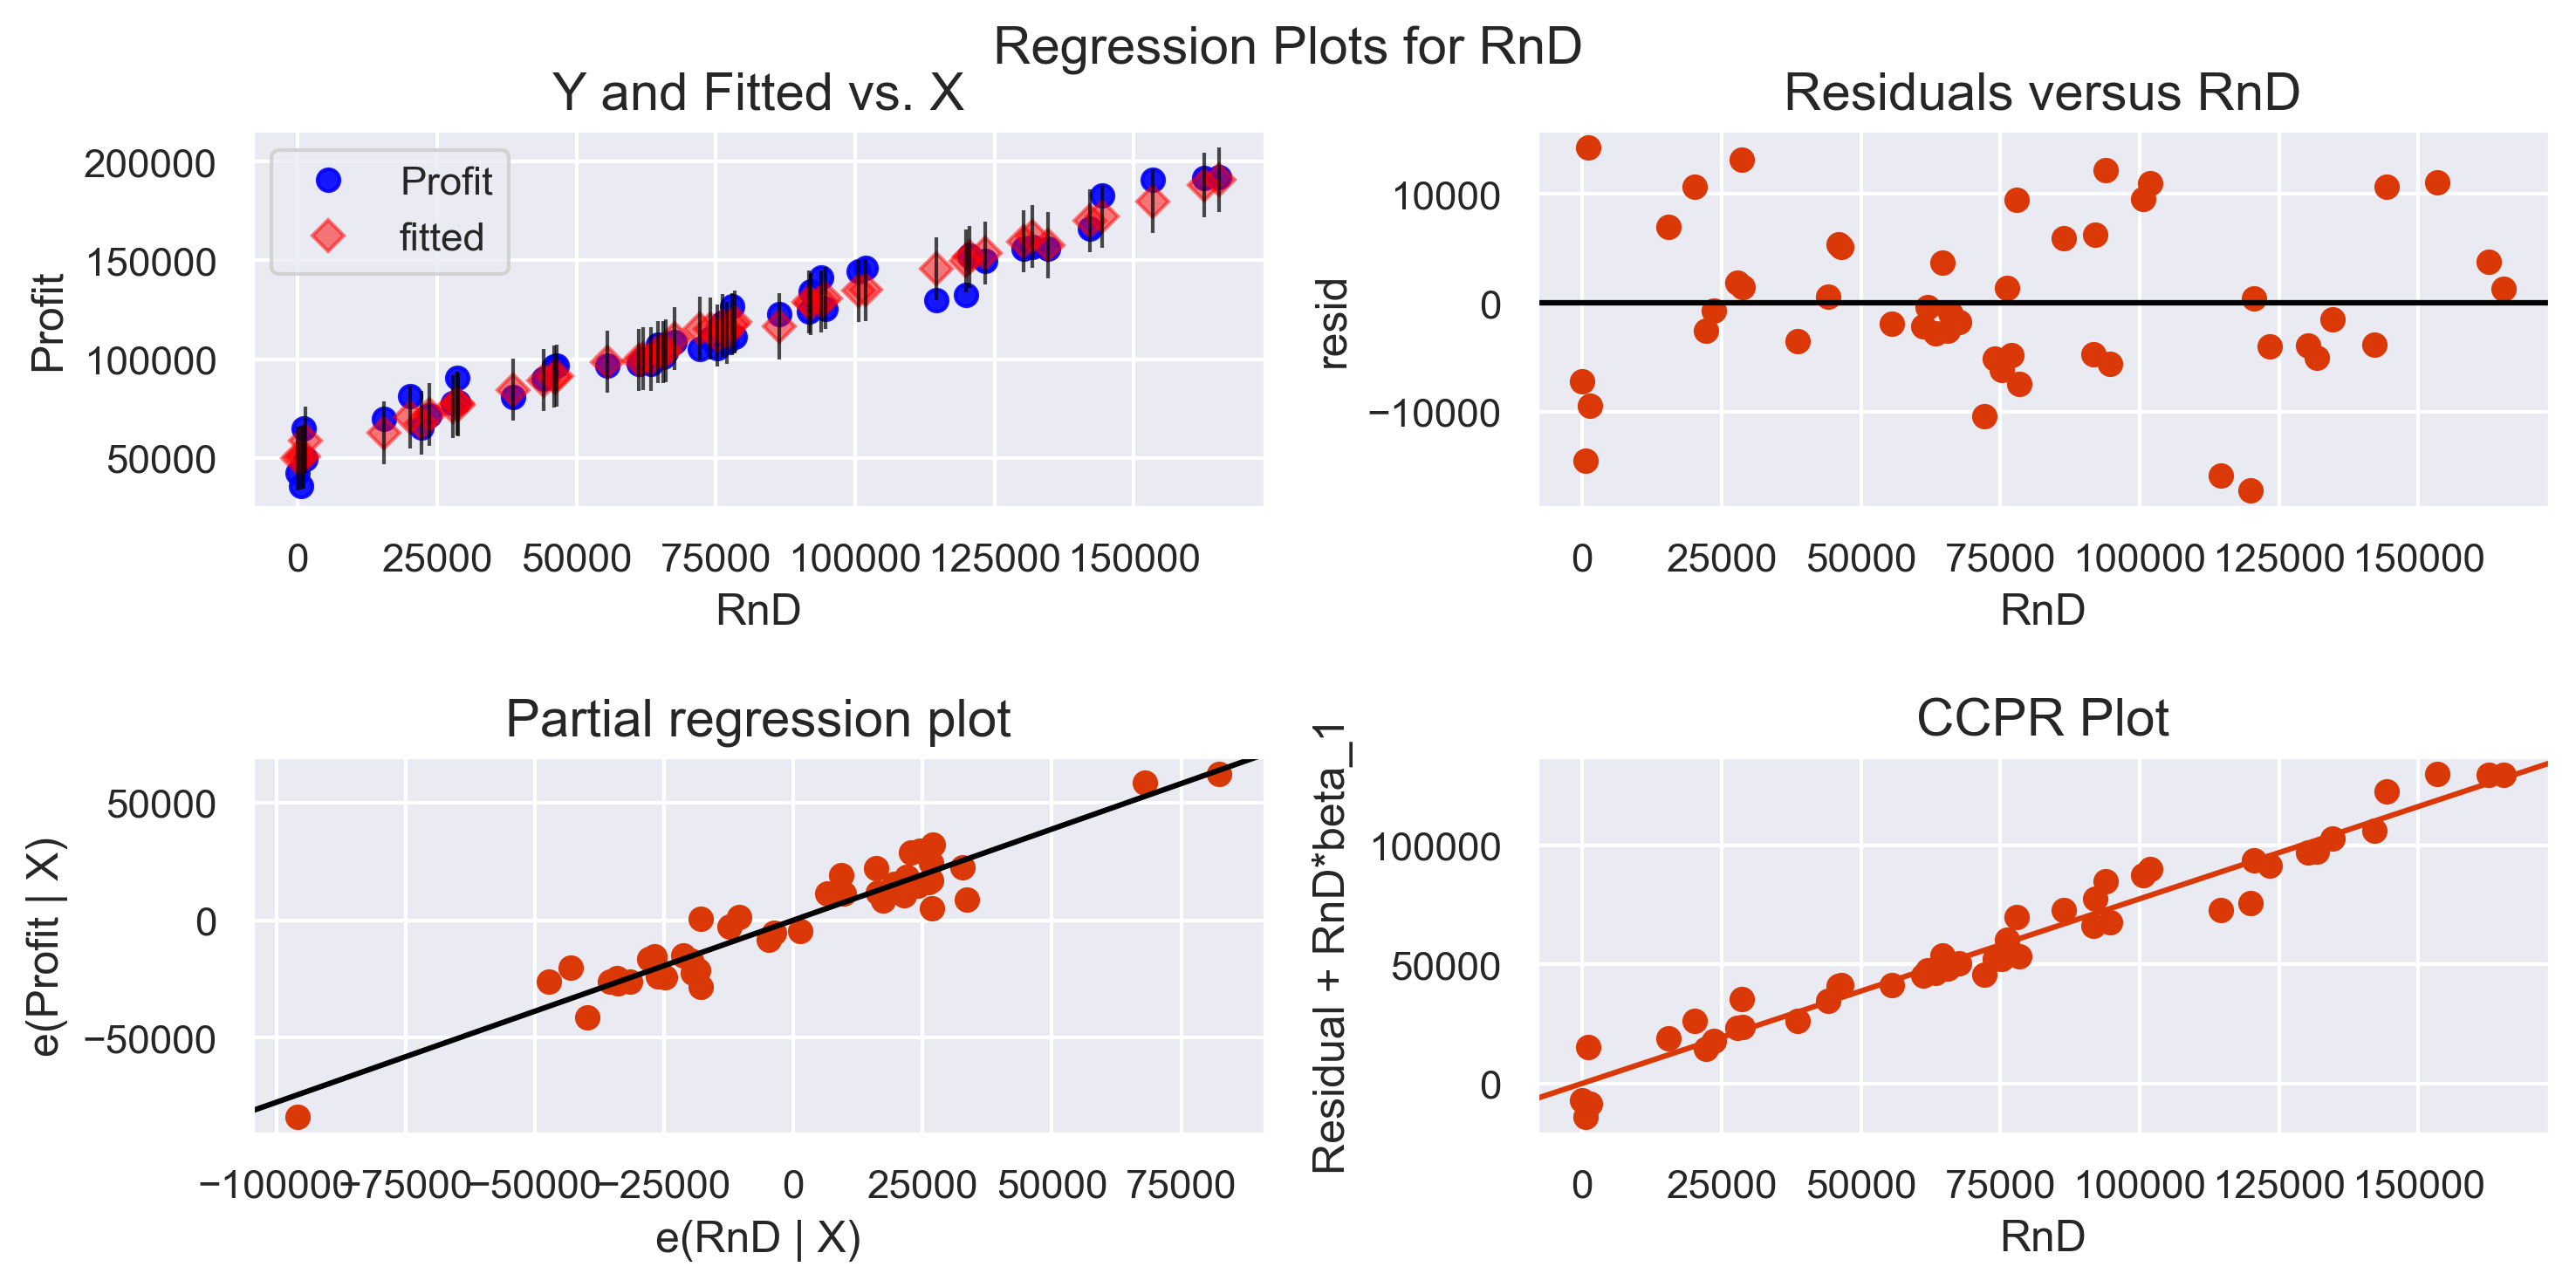

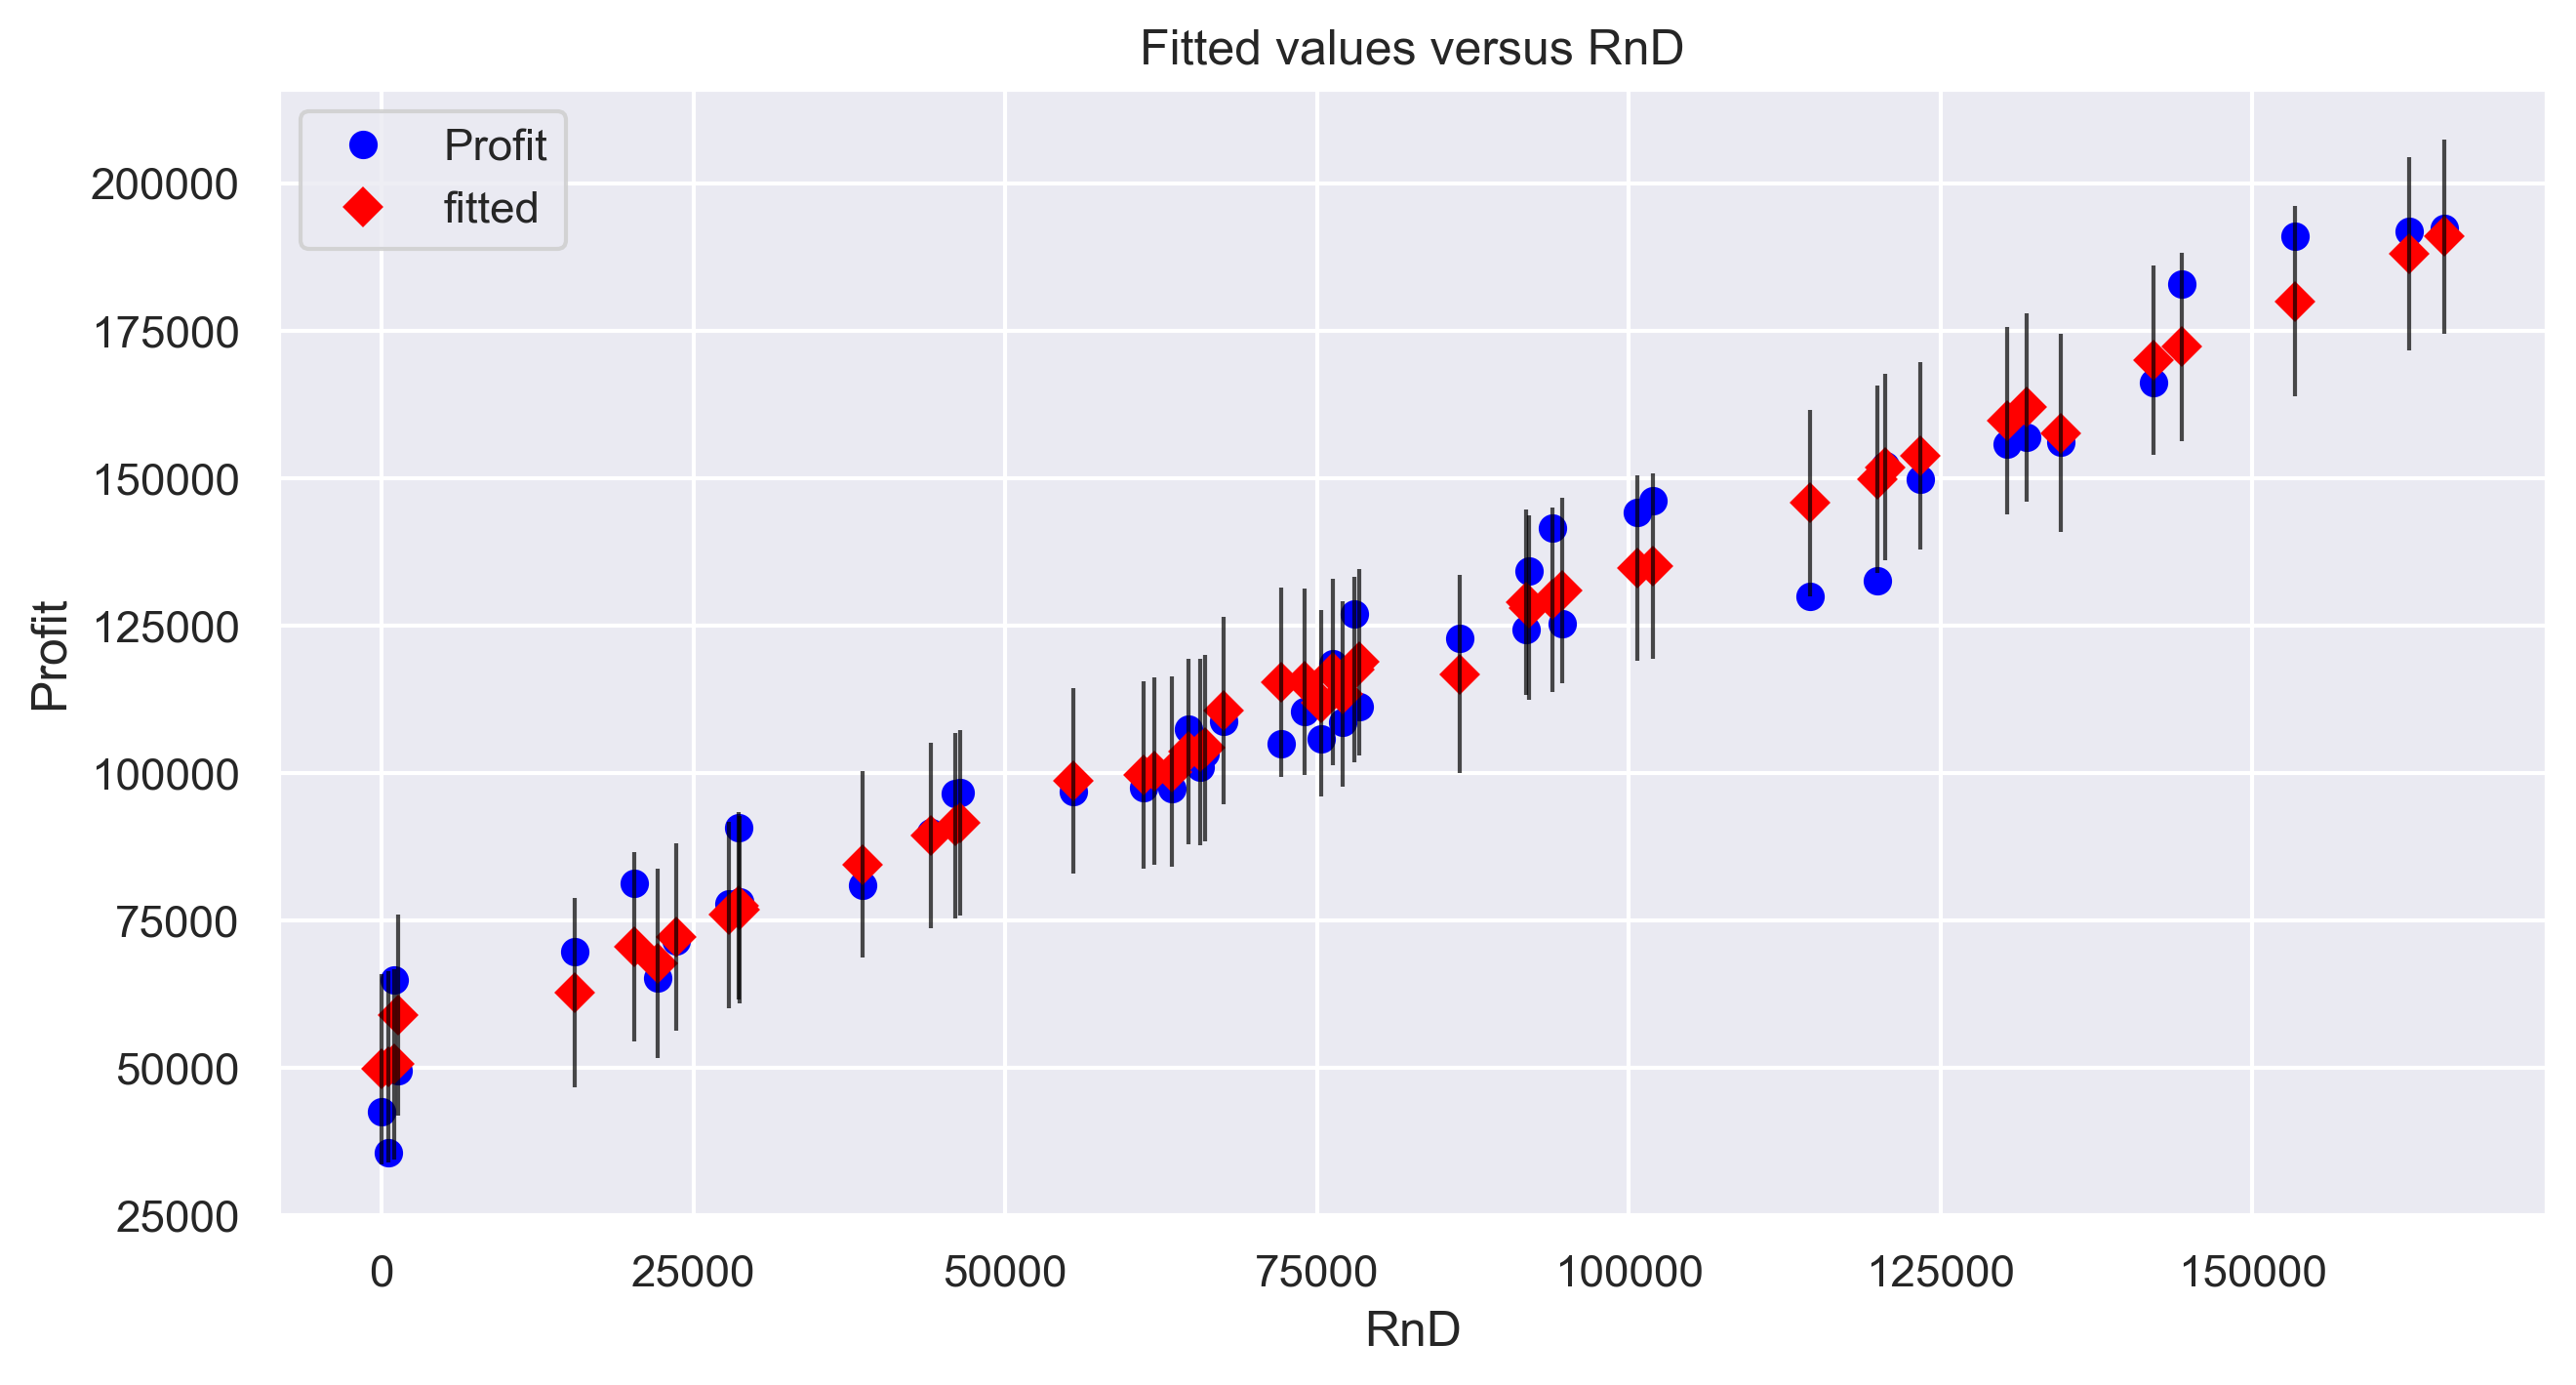

In [62]:
sm.graphics.plot_regress_exog(model_Marketing,'RnD'),sm.graphics.plot_fit(model_Marketing,'RnD')

(<Figure size 3000x1500 with 4 Axes>, <Figure size 3000x1500 with 1 Axes>)

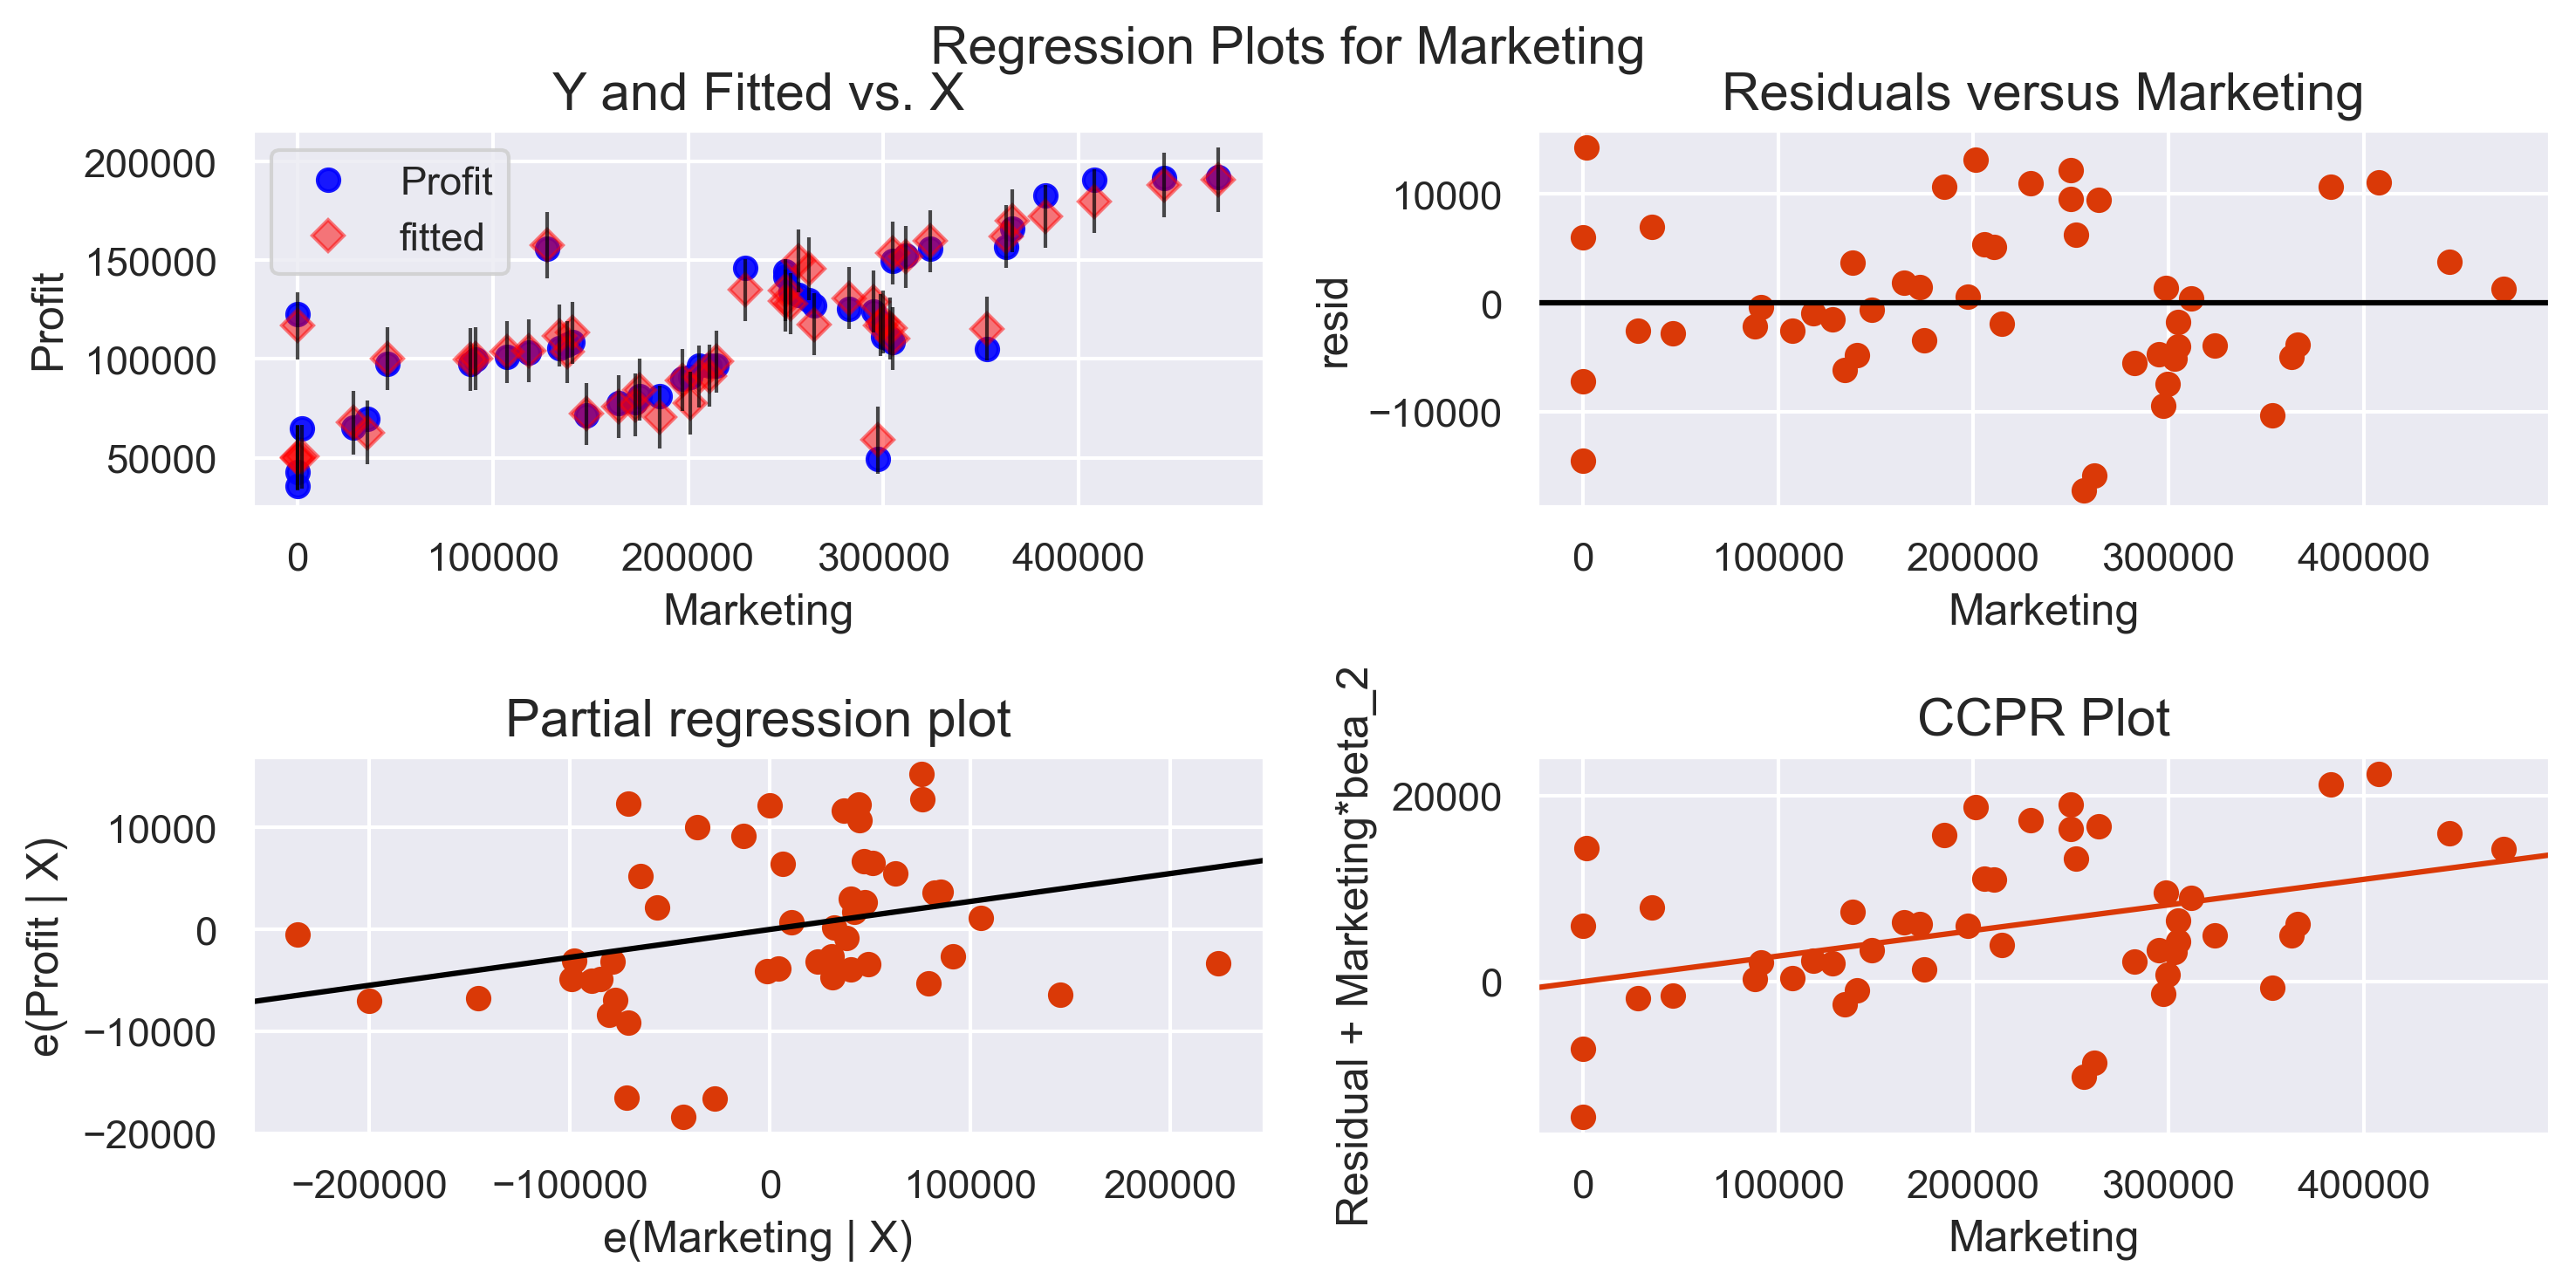

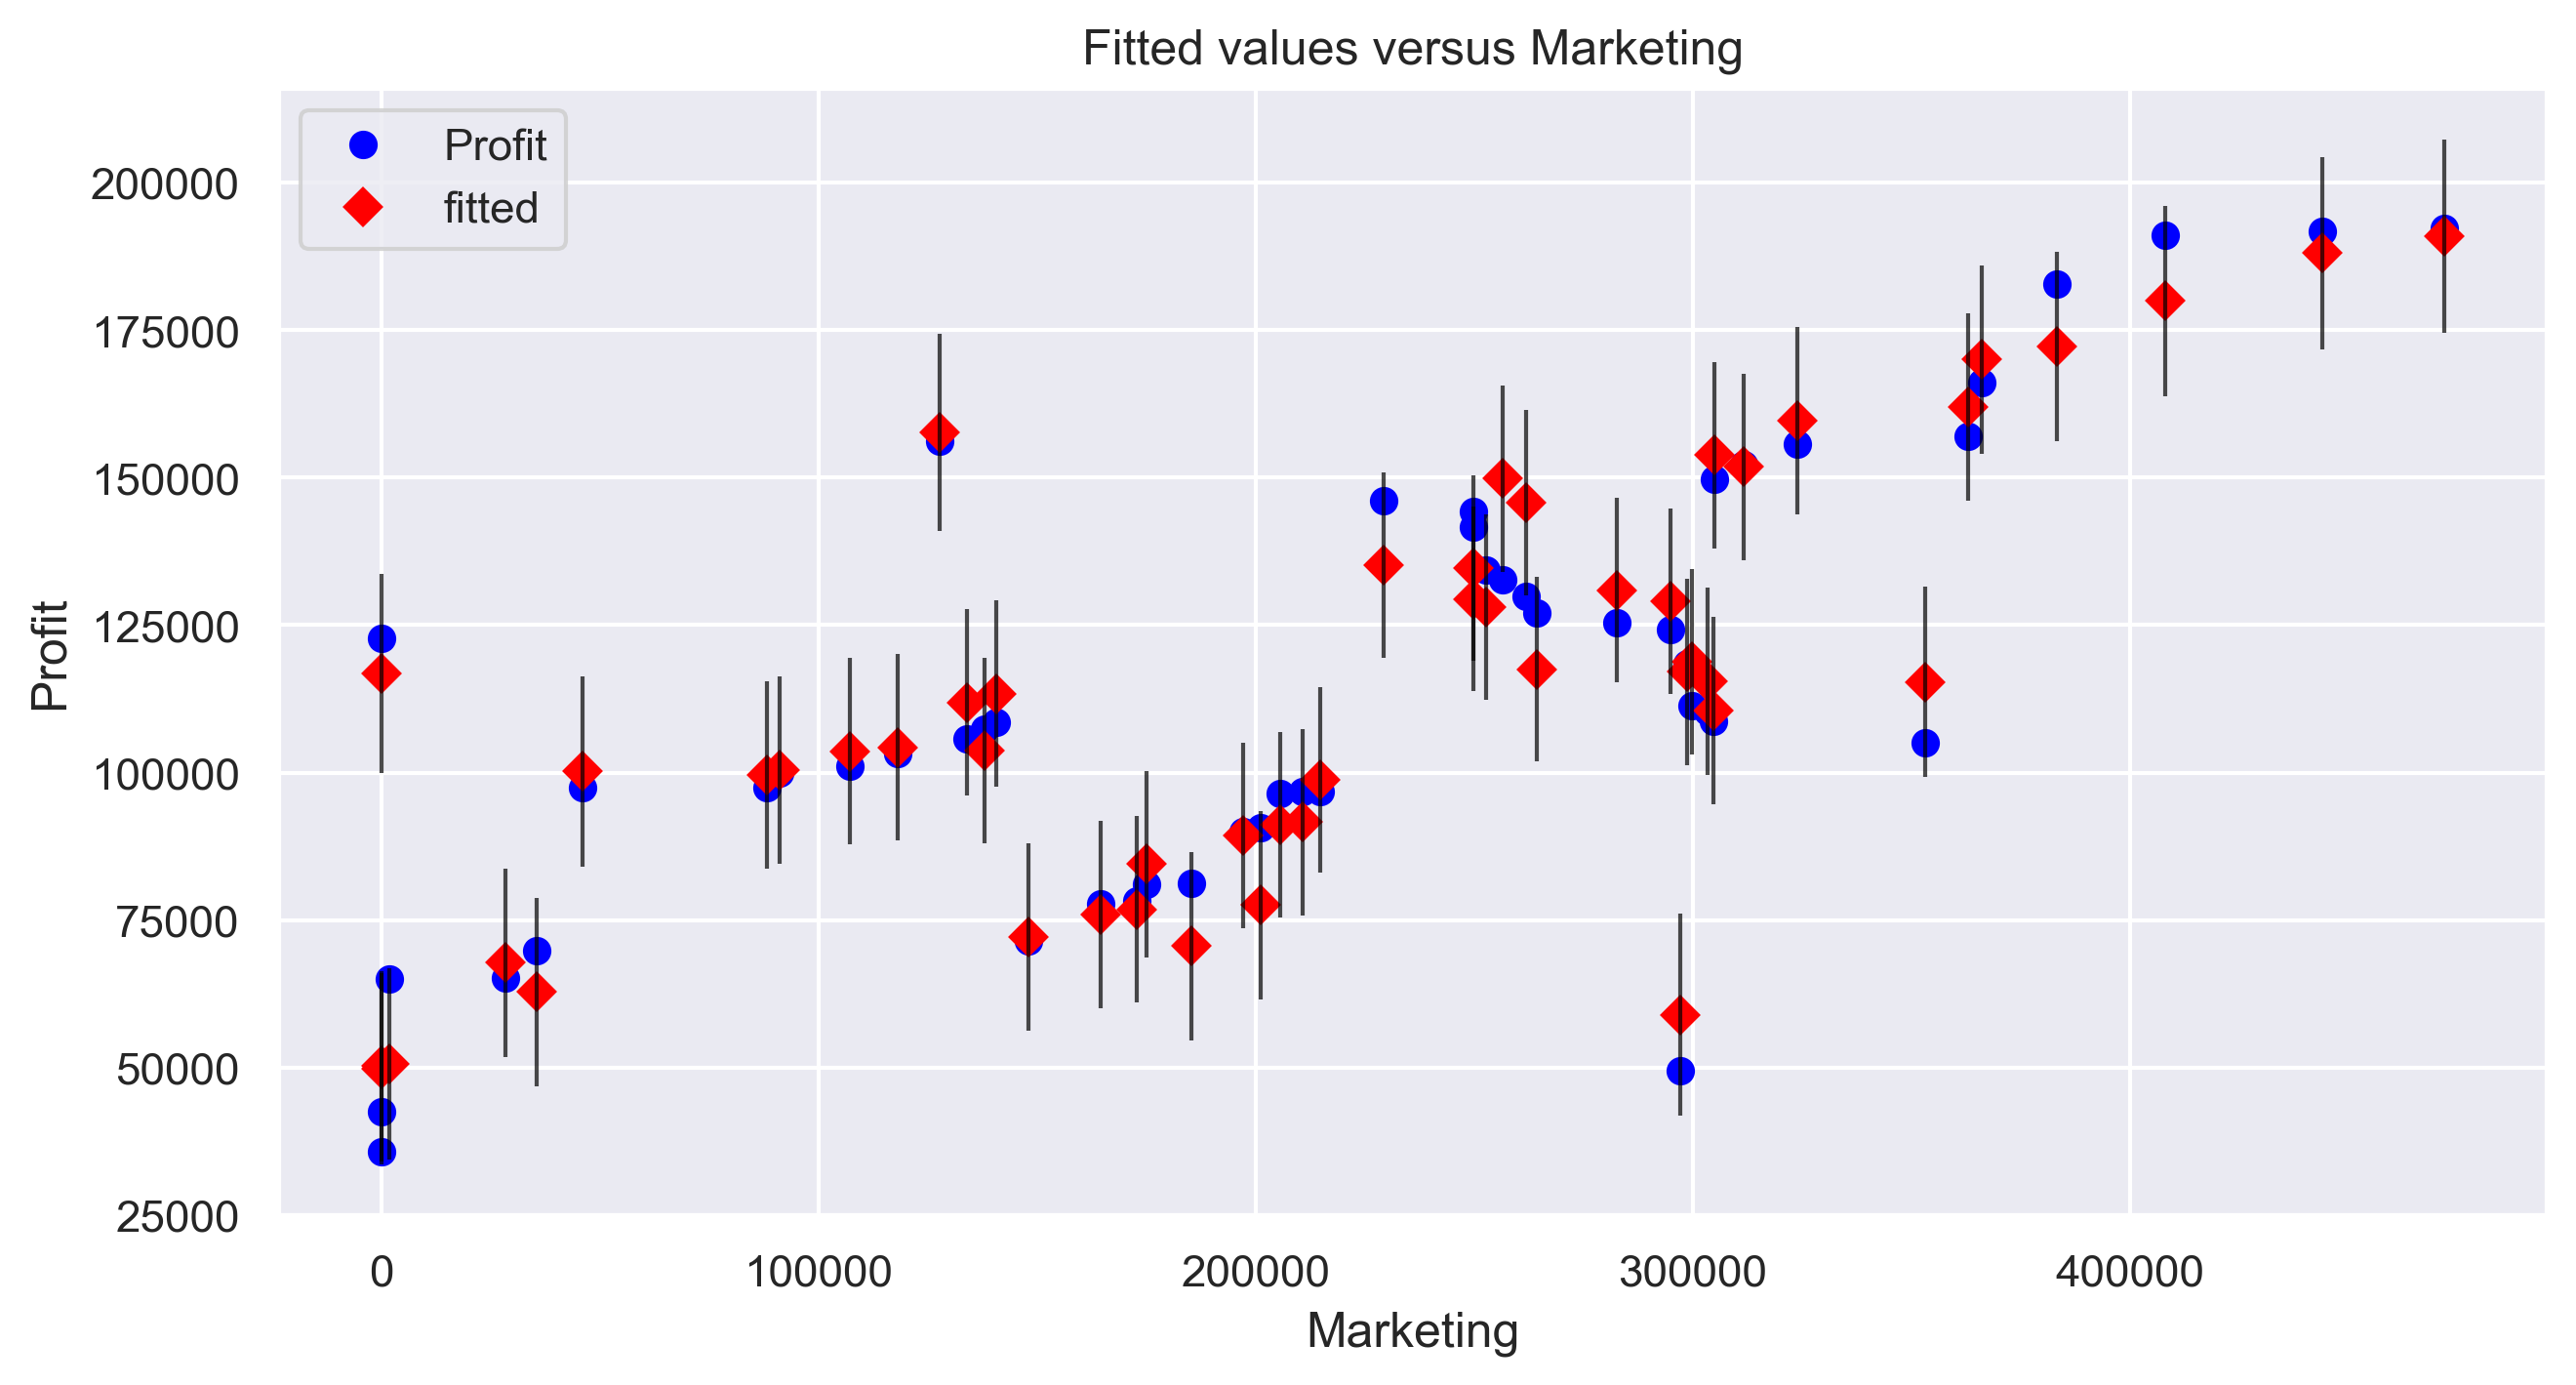

In [63]:
sm.graphics.plot_regress_exog(model_Marketing,'Marketing'),sm.graphics.plot_fit(model_Marketing,'Marketing')

# Model deletion techniques

# Cook's Distance
- detection influencers and outliers

In [64]:
#find the influence data
inf=model_Marketing.get_influence()

#calculate the cooks distance
c,p=inf.cooks_distance
print(c)

[1.59025117e-03 1.09632199e-02 7.39488185e-02 5.45173288e-02
 6.46821561e-03 9.21839288e-03 3.37428439e-03 5.03918247e-03
 4.25141144e-05 4.41111834e-03 2.29818948e-02 1.49986401e-02
 2.09655214e-02 5.41272074e-03 8.50546124e-02 5.88432136e-02
 1.39424824e-02 4.98551532e-03 4.07113636e-03 5.46646226e-02
 4.54732170e-04 1.31598004e-02 7.20929661e-03 1.04877175e-03
 5.33967837e-03 2.50589301e-03 8.98460004e-03 5.80099218e-02
 2.20178715e-04 1.82336750e-03 5.43920737e-05 1.43621749e-03
 4.31802813e-03 6.31977506e-04 5.86226058e-03 6.20774248e-03
 6.52859226e-02 7.35239813e-05 5.02124210e-02 2.71247297e-03
 6.11401560e-04 1.04702215e-03 1.46125773e-04 2.18090122e-02
 2.97731679e-03 1.27357607e-01 1.83375565e-01 3.31115992e-02
 1.33227413e-01]


<StemContainer object of 3 artists>

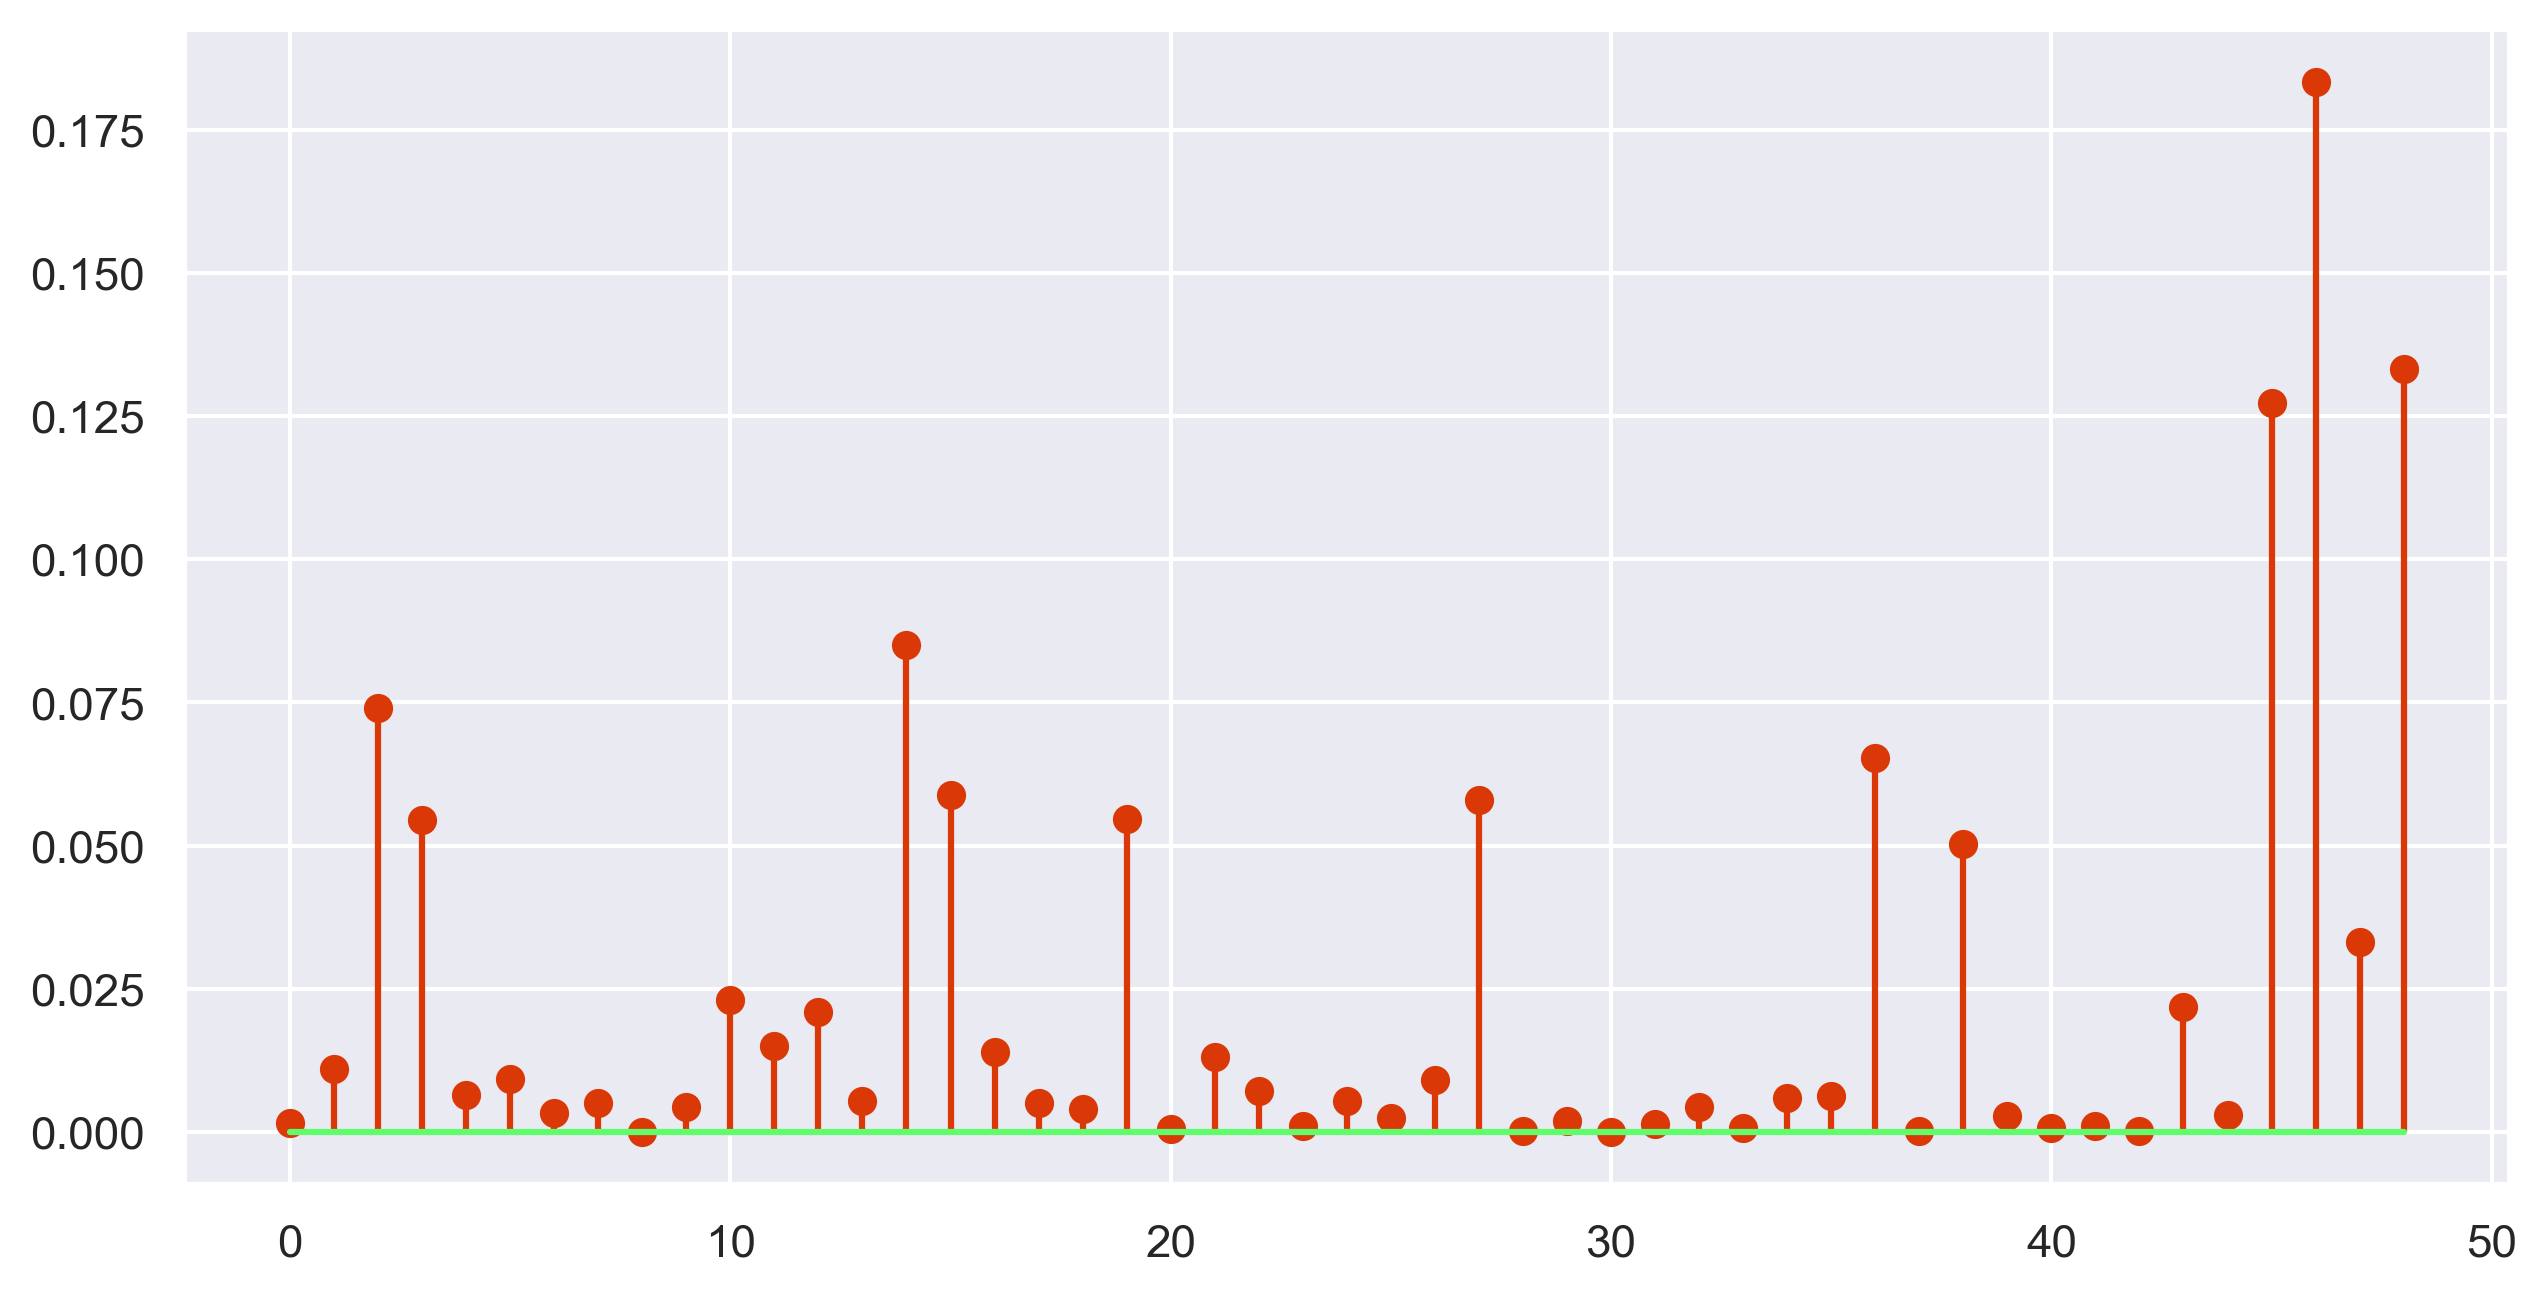

In [65]:
#cooks distance plot
plt.stem(c) #no influencer value present because no values is equal to or more than 1 in cooks distance 

In [66]:
#scalar transforamtion

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
sc=StandardScaler()

In [69]:
df_scaled=pd.DataFrame(sc.fit_transform(df1_outlier_dropped),columns=df1_outlier_dropped.columns)

In [70]:
df_scaled

,RnD,Admin,Marketing,Profit
0,2.018325,0.552080,2.146120,2.071556
1,1.956704,1.069017,1.913596,2.059122
2,1.751650,-0.724297,1.613709,2.039490
3,1.548545,-0.098597,1.407457,1.823808
4,1.497818,-1.072513,1.265442,1.381401
5,1.268706,-0.771809,1.237866,1.137968
6,1.330036,0.919834,-0.722891,1.114977
7,1.233349,0.860257,0.912791,1.105185
8,1.014870,0.974102,0.810533,1.011462
9,1.077405,-0.455342,0.755234,0.946565


In [71]:
model_scalar_transformed=smf.ols('Profit~RnD+Marketing',data=df_scaled).fit()

In [72]:
model_scalar_transformed.rsquared,model_Marketing.rsquared#don't see any changes after scalar transformation in Rsquare values 

(0.9610856807456628, 0.9610856807456628)

In [73]:
#sqrt Transforamation
df1_outlier_dropped['sqrt_Profit']=np.sqrt(df1_outlier_dropped['Profit'])
df1_outlier_dropped['sqrt_RnD']=np.sqrt(df1_outlier_dropped['RnD'])
df1_outlier_dropped['sqrt_Marketing']=np.sqrt(df1_outlier_dropped['Marketing'])

In [74]:
df1_outlier_dropped

,RnD,Admin,Marketing,Profit,sqrt_Profit,sqrt_RnD,sqrt_Marketing
0,165349.20,136897.80,471784.10,192261.83,438.476715,406.631529,686.865416
1,162597.70,151377.59,443898.53,191792.06,437.940704,403.234051,666.257105
2,153441.51,101145.55,407934.54,191050.39,437.093114,391.716109,638.697534
3,144372.41,118671.85,383199.62,182901.99,427.670422,379.963696,619.031195
4,142107.34,91391.77,366168.42,166187.94,407.661551,376.971272,605.118517
5,131876.90,99814.71,362861.36,156991.12,396.221049,363.148592,602.379747
6,134615.46,147198.87,127716.82,156122.51,395.123411,366.899796,357.374901
7,130298.13,145530.06,323876.68,155752.60,394.655039,360.968323,569.101643
8,120542.52,148718.95,311613.29,152211.77,390.143269,347.192339,558.223333
9,123334.88,108679.17,304981.62,149759.96,386.988320,351.190660,552.251410


In [75]:
model_sqrt_transformed=smf.ols('sqrt_Profit~sqrt_RnD+sqrt_Marketing',data=df1_outlier_dropped).fit()

In [76]:
model_sqrt_transformed.rsquared,model_outlier_dropped.rsquared#Rsquare value decresed after sqrt transformation

(0.9375286649931431, 0.9613162435129847)

In [77]:
df1

,RnD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [78]:
model_marketing_with_outlier=smf.ols('Profit~RnD+Marketing',data=df1).fit()

In [79]:
model_marketing_with_outlier.rsquared

0.9504503015559762

In [80]:
R_squared_table=pd.DataFrame() 

In [81]:
R_squared_table['Models']=('raw_model','model_marketing_with_outlier','model_mean_replaced','model_median_replaced','model_capped','model_outlier_dropped','model_Marketing','model_Admin','model_scalar_transformed','model_sqrt_transformed')

In [82]:
R_squared_table

,Models
0,raw_model
1,model_marketing_with_outlier
2,model_mean_replaced
3,model_median_replaced
4,model_capped
5,model_outlier_dropped
6,model_Marketing
7,model_Admin
8,model_scalar_transformed
9,model_sqrt_transformed


In [83]:
R_squared_table['R_squared_values']=(raw_model.rsquared,model_marketing_with_outlier.rsquared,model_median_replaced.rsquared,model_median_replaced.rsquared,model_capped.rsquared,model_outlier_dropped.rsquared,model_Marketing.rsquared,model_Admin.rsquared,model_scalar_transformed.rsquared,model_sqrt_transformed.rsquared)

In [84]:
R_squared_table

,Models,R_squared_values
0,raw_model,0.950746
1,model_marketing_with_outlier,0.950450
2,model_mean_replaced,0.918296
3,model_median_replaced,0.918296
4,model_capped,0.951471
5,model_outlier_dropped,0.961316
6,model_Marketing,0.961086
7,model_Admin,0.958452
8,model_scalar_transformed,0.961086
9,model_sqrt_transformed,0.937529
